In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pandasdmx as sdmx

import seaborn as sns

import plotly
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs ,init_notebook_mode ,plot ,iplot
init_notebook_mode(connected=True)

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.stats.proportion import proportions_ztest

from scipy.stats import kurtosis, skew
import scipy.stats as stats
from scipy.stats import pearsonr

from arch.unitroot import PhillipsPerron
from arch.unitroot import ZivotAndrews

/Users/krumyakimov/anaconda3/envs/datascience/lib/python3.11/site-packages/pandasdmx/remote.py:11: RuntimeWarning: optional dependency requests_cache is not installed; cache options to Session() have no effect
  warn(


# **House Price Developments in Bulgaria**
## Do housing prices reflect a new bubble?
<font>**Author: Krum Yakimov**</font>

### Abstract

This study investigates trends and dynamics of housing prices in Bulgaria across distinct time frames. Our central focus is to address a pivotal question: Is the current housing price surge indicative of a new bubble? In our pursuit of answering this critical query, we deploy a comprehensive approach encompassing a simultaneous assessment of a predefined set of conditions. We meticulously evaluate whether the annual growth rate in the deflated house prices index surpasses the 6% threshold, seeking any signs of dislocations or distortions within the real economy. These dislocations could manifest as rapid credit expansion, housing growth rates that far outpace rising rents, or an influx of excessive capital into the housing market. To decipher the stability and sustainability of house price growth, we encompase an array of rigorous statistical techniques. These include correlation analysis and hypothesis tests. By unraveling these intricate facets and harnessing the power of these statistical methods, our comprehensive analysis collectively signals that there is no housing price bubble on the horizon for Bulgaria as of the conclusion of 2022 and the first quarter of 2023.

### **1. Indroduction**

The real estate market is a critical component of any economy, influencing both financial stability and social dynamics. As housing prices fluctuate, their impacts reverberate through various sectors, from construction and mortgage lending to consumer spending and overall economic sentiment. One of the key concerns in the realm of housing markets is the potential emergence of housing bubbles, where rapid and unsustainable price growth is followed by a sharp decline, resulting in economic instability.

In the context of Bulgaria, a country that has experienced significant changes in its housing market over the past decades, assessing the presence of a housing bubble is of paramount importance. This investigation delves into the realm of house price developments in Bulgaria, employing rigorous statistical tools and hypothesis tests to ascertain whether a housing bubble is forming in the country.

The term "bubble" denotes a significant and prolonged mispricing of an asset. The challenge in identifying a housing price bubble arises due to the lack of consensus within the economic field about the precise definition of a housing bubble and the appropriate methods (methodology and tools) to confirm its presence [[1]](#7.-References).

Characteristics commonly indicating the presence of a housing price bubble encompass [[1]](#7.-References):

- Decoupling of house prices from local incomes
- Exceptionally high growth rate in deflated house prices
- Accelerated rise in house prices relative to rents
- Aberrations in the real economy, such as excessive credit supply or capital flows directed towards the housing market, as well as a surplus of construction activity.

The primary objective of this study is to meticulously examine the trends and dynamics of housing prices in Bulgaria across distinct time frames. Our central focus is to address a pivotal question: Do housing prices reflect a new bubble? To tackle this inquiry, we employ a simultaneous assessment of a predefined set of conditions.

The first set of conditions encompasses two crucial factors: a) evaluating whether the annual growth rate in the deflated house prices index surpasses the 6% threshold, and b) determining whether the ratio of housing prices to rents remains below 1.6x. This analytical aspect is referred to as the "price sustainability analysis." 

The second set of conditions hones in on identifying interrelated imbalances within the broader real economy context. This facet of the analysis is aptly termed the "dislocations analysis." 

To comprehensively evaluate the stability and viability of house price growth, we employ an array of statistical techniques. These include correlation analysis, which enables us to discern relationships between variables, and hypothesis tests, which furnish insights into the statistical significance of our findings.

By unraveling these intricate aspects and employing rigorous statistical methods, our study endeavors to shed light on the critical question of whether Bulgaria's housing market is undergoing the formation of a new housing bubble.

The OECD database is a common source for housing price data, while additional data from the Bulgarian National Statistical Institute, Bulgarian National Bank, and Eurostat are used for this study.


The notebook follows this structure:

**Section 2: Price Sustainability Analysis**
In this section, we assess the sustainability of housing prices by utilizing various indices and ratios associated with house prices, rent prices, and income. This step is pivotal to comprehend the current status of the housing market and establish a baseline for subsequent analyses.

**Section 3: Dislocations Analysis**
This segment of the analysis aims to identify any distortions or dislocations within the real economy that could indicate a potential housing price bubble. Factors such as credit supply, foreign capital inflows, and construction sector dynamics will be examined. These indicators are crucial in determining whether external factors are influencing the housing market beyond conventional supply and demand dynamics.

**Section 4: Descriptive Statistics and Correlation Analysis**
we employ hypothesis tests to compare proportions, assess the significance of coefficients, and determine the stationarity of time series data. By applying these tests to the Bulgarian housing market data, we aim to discern any significant departures from normal behavior that might indicate the formation of a housing bubble.

**Section 5: Hypothesis Tests**
We employ hypothesis tests to compare proportions, assess the significance of coefficients, and determine the stationarity of time series data. By applying these tests to the Bulgarian housing market data, we aim to discern any significant departures from normal behavior that might indicate the formation of a housing bubble.

**Section 6: Conclusion**
Summarizing our key findings, this section delves into whether the evidence substantiates the existence of a housing price bubble. Additionally, we discuss the implications of our findings and potential policy recommendations grounded in our insights.

### **2.Price Sustainability Analysis**

Housing markets are complex and unique, presenting challenges in interpreting price developments. Differences in property characteristics, low turnover rates, and other factors contribute to the complexity of assessing average price trends. Moreover, regional variations and the nontradable nature of houses further impact the determination of housing market trends and average prices[[4]](#7.-References).

#### **Aspects of Housing Markets**[[4]](#7.-References)

Key features that differentiate housing markets from other markets include:

- **Heterogeneity:** Properties vary in characteristics, and even identical properties may differ in location, a significant price influencer.
- **High Transaction Costs and Low Turnover:** Infrequent trades and high transaction costs make tracking price developments challenging.
- **Varying Conditions of Sales:** Bilateral negotiations determine prices along with property conditions and other sale aspects.
- **Rigid Supply:** Scarcity of buildable land and time needed for construction contribute to supply lags.
- **Varying Financing Conditions:** Diverse international financing conditions influence housing markets.
- **Impact of Taxes and Subsidies:** Taxation, incentives, and subsidies significantly affect housing market dynamics.

**Measurement issues**

Measuring real estate developments is challenging due to comparability issues. Price developments are often measured by mean or median transaction prices, but these suffer from changing object compositions. Methods like the repeat sales method or hedonic price models account for quality changes, yet they come with their own limitations and data requirements.

**Data availability**

Real estate markets lack transparency and timely data. Access to reliable real estate data, including price indices, rents, vacancy rates, and construction costs, is limited.

#### **2.1. Data Sources**

We utilized an OECD dataset for Residential Property Prices Indices (RPPIs), also referred to as House Price Indices (HPIs). The dataset comprises quarterly and annual statistics, including seasonally adjusted figures and indices (2015=100). Annual figures represent yearly averages.

The defined House Price Indices include:

- `Nominal House Price Index:` Covers new and existing dwelling sales, following RPPI recommendations.
- `Real House Price Index:` Calculated by dividing the nominal house price index by the consumers’ expenditure deflator, adjusted for seasonality.
- `Housing Rent Prices Index:` Tracks prices paid for renting property from private landlords.
- `Price to Income Ratio:` Derived by dividing the nominal house price index by the nominal disposable income per head, measuring affordability.
- `Price to Rent Ratio:` Obtained by dividing the nominal house price index by the housing rent price index, indicating house ownership profitability.

Overvaluation of house prices can be indicated if price-to-income and price-to-rent ratios surpass long-term averages. Note that these ratios are derived from nominal price indices.

#### **2.2. Data Preparation and Structuring**

In [3]:
# Loading a OECD data
oecd_data = pd.read_csv("data/housing_prices_all.csv")
oecd_data

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,HOUSECOST,NOMINAL,IDX2015,A,1970,2.552380,NaN
1,AUS,HOUSECOST,NOMINAL,IDX2015,A,1971,2.851352,NaN
2,AUS,HOUSECOST,NOMINAL,IDX2015,A,1972,3.183667,NaN
3,AUS,HOUSECOST,NOMINAL,IDX2015,A,1973,3.837183,NaN
4,AUS,HOUSECOST,NOMINAL,IDX2015,A,1974,4.690199,NaN
...,...,...,...,...,...,...,...,...
41939,ROU,HOUSECOST,RENT,IDX2015,Q,2022-Q2,117.098147,NaN
41940,ROU,HOUSECOST,RENT,IDX2015,Q,2022-Q3,119.179128,NaN
41941,ROU,HOUSECOST,RENT,IDX2015,Q,2022-Q4,122.082994,NaN
41942,ROU,HOUSECOST,RENT,IDX2015,Q,2023-Q1,125.008104,NaN


In [4]:
# Showing a concise summary of a DataFrame
oecd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41944 entries, 0 to 41943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    41944 non-null  object 
 1   INDICATOR   41944 non-null  object 
 2   SUBJECT     41944 non-null  object 
 3   MEASURE     41944 non-null  object 
 4   FREQUENCY   41944 non-null  object 
 5   TIME        41944 non-null  object 
 6   Value       41944 non-null  float64
 7   Flag Codes  0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 2.6+ MB


The data column types are accurate, except for the "TIME" column, which represents dates but is currently of "object" type. We won't modify the data type of the "TIME" column, as the `period[Q-DEC]` quarter data type is not compatible with the x-axis of Matplotlib. However, using strings for this purpose works as expected.

In [5]:
# Checking for unique value in "LOCATION" columm which represent the countries
oecd_data.LOCATION.unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'BRA', 'CHL', 'CHN', 'COL', 'EST', 'IND',
       'IDN', 'ISR', 'LVA', 'LTU', 'RUS', 'SVN', 'ZAF', 'EA', 'EA17',
       'OECD', 'CRI', 'BGR', 'ROU', 'SAU', 'HRV'], dtype=object)

The countries are represented by ISO 3166-1 alpha-3 codes, which are three-letter country codes defined in the ISO 3166-1 standard published by the International Organization for Standardization. In order to enhance visualization and facilitate subsequent analysis, we will be including both the country names and their corresponding alpha-2 codes in the dataset.

In [6]:
# Loading the list of ISO 3166 country codes
countries_list = pd.read_csv("data/country_code_list.csv")
countries_list.head(3)

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN


In [7]:
# Droping unnecessary columns from countries_list
countries_list.drop(
    ["country-code", "iso_3166-2", "region",
     "sub-region", "intermediate-region", "region-code",
     "sub-region-code", "intermediate-region-code"],
    axis = 1, inplace = True)

In [8]:
# Renaming columns in countries_list
countries_list.rename(
    columns = {"name":"country_name",
               "alpha-2":"country_code_2",
               "alpha-3":"country_code_3"},
    inplace=True)

In [9]:
# Merging the datasets
oecd_data = pd.merge(
    oecd_data, countries_list,
    how = "left",
    left_on ="LOCATION",
    right_on = "country_code_3")

In [10]:
# Droping unnecessary columns from countries_list
oecd_data.drop(
    ["Flag Codes",
     "INDICATOR",
     "MEASURE",
     "country_code_3"],
    axis = 1, inplace = True)

In [11]:
# Renaming columns for better readability
oecd_data.rename(
    columns={"LOCATION": "country_code_3",
             "SUBJECT": "subject",
             "FREQUENCY": "frequency",
             "TIME": "year",
             "Value": "value"},
    inplace = True)

In [12]:
mapping = {
    "NOMINAL": "nominal",
    "PRICEINCOME": "priceincome",
    "PRICERENT": "pricerent",
    "REAL": "real",
    "RENT": "rent"}

oecd_data["subject"] = oecd_data["subject"].replace(mapping)

In [13]:
oecd_data.head()

,country_code_3,subject,frequency,year,value,country_name,country_code_2
0,AUS,nominal,A,1970,2.552380,Australia,AU
1,AUS,nominal,A,1971,2.851352,Australia,AU
2,AUS,nominal,A,1972,3.183667,Australia,AU
3,AUS,nominal,A,1973,3.837183,Australia,AU
4,AUS,nominal,A,1974,4.690199,Australia,AU


<!-- We select conducting the comprehensive analysis of house price developments in Bulgaria and investigating the presence of a potential housing price bubble -->

The primary objective of this study is to comprehensively understand the dynamics of the housing market in Bulgaria and investigate the potential emergence of a housing price bubble within the country's specific context. In light of this research goal, the decision has been made to exclusively utilize data sourced from Bulgaria. This approach is chosen to ensure a focused examination of Bulgaria's housing market landscape and to directly address the research questions pertaining to the housing price bubble phenomenon within this national setting.

In [14]:
# Selecting data for Bulgaria
hpi_bg = oecd_data[oecd_data["country_code_3"] == "BGR"]
hpi_bg.country_name.unique()

array(['Bulgaria'], dtype=object)

In [15]:
hpi_bg

,country_code_3,subject,frequency,year,value,country_name,country_code_2
40467,BGR,nominal,A,2005,80.085000,Bulgaria,BG
40468,BGR,nominal,A,2006,91.857500,Bulgaria,BG
40469,BGR,nominal,A,2007,118.420000,Bulgaria,BG
40470,BGR,nominal,A,2008,147.972500,Bulgaria,BG
40471,BGR,nominal,A,2009,117.785000,Bulgaria,BG
...,...,...,...,...,...,...,...
41397,BGR,rent,Q,2022-Q2,117.605798,Bulgaria,BG
41398,BGR,rent,Q,2022-Q3,119.568966,Bulgaria,BG
41399,BGR,rent,Q,2022-Q4,121.545222,Bulgaria,BG
41400,BGR,rent,Q,2023-Q1,126.065029,Bulgaria,BG


#### **Data Preparation for In-Depth Analysis**

Prior to delving into a comprehensive examination of house price dynamics in Bulgaria and the exploration of potential housing price bubbles, a meticulous approach was adopted to transform and organize the dataset:

- **Data Transformation**: The initial dataset underwent a strategic transformation, transitioning to a wide format through pivoting. This transformation allocated dedicated columns for key variables of interest, namely:
  - `NOMINAL`: Representing the **Nominal House Price Index**
  - `PRICEINCOME`: Indicating the **Price-to-Income Ratio**
  - `REAL`: Signifying the **Real House Price Index**
  - `PRICERENT`: Denoting the **Price-to-Rent Ratio**
  - `RENT`: Reflecting the **Rent Prices Index**
  
This pivot operation elevated the efficiency of applying diverse analysis techniques, enabling a more comprehensive exploration of the data. The structured format facilitated the identification of trends, patterns, and interrelationships.

By methodically organizing the data, a robust foundation was established for conducting insightful analyses within the context of the Bulgarian housing market. The subsequent sections of this study delve into the methodologies employed and the invaluable insights gleaned from the meticulous preparation and analysis of this refined dataset.

We perform calculations to determine the percentage change for each index from the previous quarter or year. This process provides us with the quarter-to-quarter or year-to-year growth rates for each variable.

In [16]:
def process_data(data, frequency):
    hpi_bg_selected = data[data["frequency"] == frequency]
    hpi_bg_pivoted = hpi_bg_selected.pivot(
        index = ("year", "country_name", "country_code_2", "country_code_3"), columns = "subject", values = "value")
    hpi_bg_pivoted.reset_index(inplace = True)

    columns_to_check = ["nominal", "priceincome", "pricerent", "real"]
    hpi_bg_cleaned = hpi_bg_pivoted.dropna(
        subset = columns_to_check, how = "any").copy()

    columns_to_diff = ["nominal", "priceincome", "pricerent", "real", "rent"]
    diff_column_suffix = "QoQ%" if frequency == "Q" else "YoY%"

    for col in columns_to_diff:
        new_col_name = f"{col}_{diff_column_suffix}"
        hpi_bg_cleaned[new_col_name] = hpi_bg_cleaned[col].pct_change() * 100

    return hpi_bg_cleaned

In [17]:
hpi_bg_quarterly = process_data(hpi_bg, frequency = "Q")
hpi_bg_quarterly.head()

subject,year,country_name,country_code_2,country_code_3,nominal,priceincome,pricerent,real,rent,nominal_QoQ%,priceincome_QoQ%,pricerent_QoQ%,real_QoQ%,rent_QoQ%
33,2005-Q1,Bulgaria,BG,BGR,75.552121,158.372351,109.897790,101.668821,68.748248,NaN,NaN,NaN,NaN,NaN
34,2005-Q2,Bulgaria,BG,BGR,79.553797,161.061247,114.037459,106.914657,69.761741,5.296577,1.697832,3.766835,5.159730,1.474210
35,2005-Q3,Bulgaria,BG,BGR,81.675701,159.623432,116.015494,107.896662,70.401320,2.667256,-0.892713,1.734549,0.918494,0.916805
36,2005-Q4,Bulgaria,BG,BGR,83.558380,157.788151,117.420412,106.718321,71.162359,2.305066,-1.149757,1.210975,-1.092102,1.081001
37,2006-Q1,Bulgaria,BG,BGR,87.050696,159.289101,119.855139,114.880021,72.630581,4.179492,0.951244,2.073512,7.647890,2.063199


In [18]:
hpi_bg_annual = process_data(hpi_bg, frequency = "A")
hpi_bg_annual.head()

subject,year,country_name,country_code_2,country_code_3,nominal,priceincome,pricerent,real,rent,nominal_YoY%,priceincome_YoY%,pricerent_YoY%,real_YoY%,rent_YoY%
8,2005,Bulgaria,BG,BGR,80.0850,159.211295,114.342789,105.799615,70.018417,NaN,NaN,NaN,NaN,NaN
9,2006,Bulgaria,BG,BGR,91.8575,160.188191,124.373069,118.735397,73.826846,14.700006,0.613584,8.772115,12.226681,5.439181
10,2007,Bulgaria,BG,BGR,118.4200,179.757267,154.307470,140.562834,76.665250,28.917073,12.216304,24.068233,18.383260,3.844678
11,2008,Bulgaria,BG,BGR,147.9725,184.036845,173.812776,165.398835,85.165462,24.955666,2.380754,12.640545,17.668967,11.087439
12,2009,Bulgaria,BG,BGR,117.7850,140.973082,125.408003,130.821627,94.059851,-20.400750,-23.399533,-27.848800,-20.905351,10.443657


#### **2.3.Data Visualization and Exploration**

In this section, we delve into Data Visualization, an essential component of our analysis that enables us to communicate insights derived from the housing market data effectively. To illuminate trends and encourage insightful discussions, we have developed three distinct functions tailored for visualizing the data.

1. **house_prices_plot_1**: Leveraging Plotly, this function generates interactive line charts that unveil the evolution of individual variables over time. By inputting the dataset, the variable of interest, a descriptive title, and the desired chart height, dynamic visualizations come to life, spotlighting key trends.

2. **house_prices_plot_2**: With the aid of Matplotlib, this function crafts informative bar charts embellished with actual values atop each bar. By inputting the dataset, the variable under scrutiny, and an appropriate title, the resulting charts elucidate distribution patterns and provide precise numerical context.

3. **house_prices_plot_3**: Similar to the first function, this Plotly-powered tool produces interactive line charts to visualize the evolution of selected variables over time. By providing the dataset, the chosen variables, a descriptive title, and the chart height, dynamic visualizations emerge, shedding light on significant trends.

4. **house_prices_plot_4**: Integrating the capabilities of both Plotly and Matplotlib, this function generates comprehensive visualizations featuring paired line and bar charts. By specifying dataset columns, titles, and subplot labels, a comprehensive depiction of data relationships is achieved, enriching discussions and insights.

In [19]:
def house_prices_plot_1(data, col, title, title_x, title_y, height, color):
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x = data["year"],y = data[col],
        name = col, line = dict (color = color)))

    fig.update_layout(
        title = title,
        height = height,
        plot_bgcolor = "white")

    fig.update_yaxes(
        showgrid = True,
        gridcolor = "lightgray",
        title = title_x)
    fig.update_xaxes(title = title_y)

    fig.show()

In [20]:
def house_prices_plot_2(data, value_col, title, title_x, title_y, color, edgecolor):
    plt.figure(figsize = (10, 6))

    bars = plt.bar(
        data["year"],
        data[value_col], 
        color = color,
        edgecolor = edgecolor)

    plt.title(title)
    plt.xlabel(title_x)
    plt.ylabel(title_y)

    for bar in bars:
        yval = bar.get_height()
        xpos = bar.get_x() + bar.get_width() / 2.0
        if yval >= 0:
            ypos = yval + 0.2
            valign = "bottom"
        else:
            ypos = yval - 0.4
            valign = "top"
        if np.isfinite(xpos) and np.isfinite(ypos):
            plt.text(xpos, ypos, f"{yval:.2f}", ha = "center", va = valign, color = "black")

    plt.gca().set_facecolor("white")
    plt.gca().xaxis.grid(False)
    plt.gca().yaxis.grid(False)

    data_min = data[value_col].min()
    data_max = data[value_col].max()
    padding = 5
    plt.ylim(data_min - padding, data_max + padding)

    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

    plt.gca().set_yticks([])
    # plt.xticks(rotation = 45)
    plt.tight_layout()

    plt.show()

In [21]:
def house_prices_plot_3(data, col1, col2, title, title_x, title_y, height, color1, color2):
    fig = make_subplots(rows = 1, cols = 1)
    
    fig.add_trace(go.Scatter(
        x = data["year"], y = data[col1],
        name = col1, line = dict(color = color1)), row = 1 , col = 1)
    
    fig.add_trace(go.Scatter(
        x = data["year"], y = data[col2],
        name = col2, line = dict(color = color2)), row = 1, col = 1)
    
    fig.update_layout(
        title = title,
        height = height,
        plot_bgcolor = "white")
    
    fig.update_xaxes(title = title_x)
    fig.update_yaxes(title = title_y) 
    fig.update_yaxes(showgrid = True, gridcolor = "lightgray")
    # fig.update_xaxes(tickangle = 45)
    
    fig.show()

In [22]:
def house_prices_plot_4(
    data, col1, col2, col3, col4,
    title, height, subplot_title1, subplot_title2,
    title_x1, title_y1, title_x2, title_y2):
    
    fig = make_subplots(
        rows = 1, cols = 2,
        subplot_titles = (subplot_title1, subplot_title2))
    
    fig.add_trace(go.Scatter(
        x = data["year"], y = data[col1],
        name = col1, line = dict(color = "blue")), row = 1, col = 1)
    
    fig.add_trace(go.Scatter(
        x = data["year"], y = data[col2],
        name = col2, line = dict(color = "red")), row = 1, col = 1)
    
    fig.add_trace(go.Bar(
        x = data["year"], y = data[col3],
        name = col3, marker_color = "blue"), row = 1, col = 2)
    
    fig.add_trace(go.Bar(
        x = data["year"], y = data[col4],
        name = col4, marker_color = "red"), row = 1, col = 2)
    
    fig.update_layout(
        title = title,
        height = height,
        plot_bgcolor = "white")
    
    fig.update_xaxes(title = title_x1, row = 1, col = 1)
    fig.update_yaxes(title = title_y1, row = 1, col = 1)
    fig.update_xaxes(title = title_x2, row = 1, col = 2)
    fig.update_yaxes(title = title_y2, row =1, col = 2)
    
    fig.update_yaxes(showgrid = True, gridcolor = "lightgray")
    fig.update_xaxes(tickangle = 45)
    
    fig.show()

#### **Analyzing Housing Price and Rent Trends**

We've employed time series plots to visualize the progression of housing prices and rents throughout the years, coupled with growth rate visualizations to uncover underlying trends and fluctuations.

Figure 1 displays the nominal house price index (NHPI). Over the entire span from 2005 to 2022, the NHPI exhibited a cumulative growth of approximately 112.08%, progressing from 80.1 in 2005 to 169.92 in 2022.

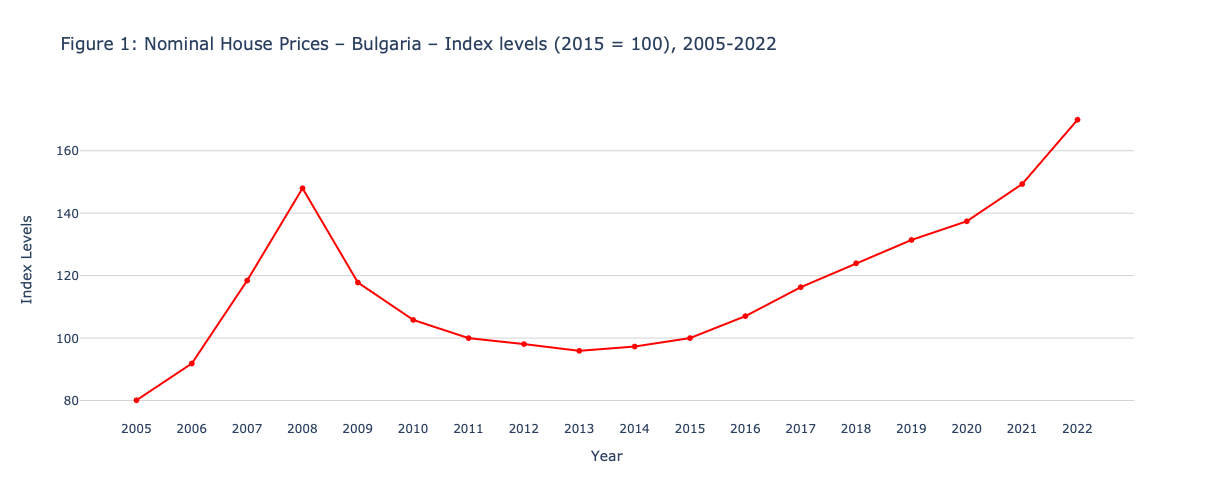

In [23]:
house_prices_plot_1(
    data = hpi_bg_annual,
    col = "nominal",
    title = "Figure 1: Nominal House Prices – Bulgaria – Index levels (2015 = 100), 2005-2022",
    title_x = "Index Levels", title_y = "Year",
    height = 500, color = "red")

**Interpreting Insights from Figure 1**

The time series plot provides a comprehensive view of the distinct phases within the housing price cycle, offering valuable insights into the market's behavior over time:

- **Phase One: Rapid Price Growth (2005-2008)** - The initial phase demonstrated a significant surge in housing prices, particularly between 2005 and 2008. This period was characterized by robust price increases that exceeded inflation rates, leading to concerns about affordability for potential buyers.

- **Phase Two: Downward Correction (2009-2013)** - Subsequently, a correction in housing prices occurred from 2009 to 2013. During this phase, prices either declined or experienced slower growth compared to inflation. Economic challenges during this period contributed to improved housing affordability.

- **Phase Three: Moderate Growth (2014-2022)** - From 2014 to 2022, a phase of moderate growth emerged, marked by steady and controlled increases in housing prices. This period coincided with relatively stable economic conditions, which supported the gradual upward movement of prices.

> **Key Takeaways:**
- The visualization effectively highlights the interplay between significant economic events and the housing market's fluctuations. Notably, the impact of the 2008 global financial crisis and the 2020-2021 COVID-19 pandemic is evident.
- The housing market's resilience is remarkable, with the ability to swiftly recover following downturns. This resilience underscores its fundamental strength and adaptability in the face of adverse circumstances.
- Variations in growth rates across different time periods underscore the importance of considering the broader economic context and market dynamics when interpreting housing market trends.

#### **Exploring Real House Prices and Housing Affordability**

Within our analysis, we delve into the **Real House Price Index (RHPI)**, a pivotal component of the Scoreboard of indicators utilized in the European Commission's Macroeconomic Imbalances Procedure (MIP).

The RHPI is an index that takes into account the interplay between nominal house prices and consumer price inflation. It offers an insightful perspective by deflating nominal house prices with an index of consumer price inflation. This deflation process, which considers either the Harmonized Index of Consumer Prices (HICP) or a national accounts final consumption deflator, effectively removes the influence of inflation from housing price trends. Our focus remains on the deflated RHPI, utilizing the national accounts household final consumption deflator, as adopted in both the MIP Scoreboard and our publication. An essential metric derived from the deflated RHPI is its growth rate, a vital variable in understanding the cyclical patterns of house prices. A notably high growth rate acts as an early warning signal, highlighting potential tensions within the real estate market and signaling the emergence of price bubbles. The MIP context defines a crucial threshold—a 6% annual growth rate in the deflated RHPI—based on an analysis of historical data reflecting previous cycles of house price fluctuations.

> **Note: The incorporation of this indicator aids in assessing whether housing prices exhibit indications of a bubble.**

In parallel, the **Price-to-Income Ratio (PIR)** emerges as a vital metric. Calculated by dividing the nominal House Price Index by the nominal disposable income per capita, it serves as a measure of housing affordability. Lower PIR values signify more accessible housing.

Figures 2 and 3 offer a visual presentation of the RHPI and PIR, including the annual rate of change of RHPI. These figures provide dynamic representations of their behavior, yielding insights into the evolving trends and patterns within the housing market landscape.

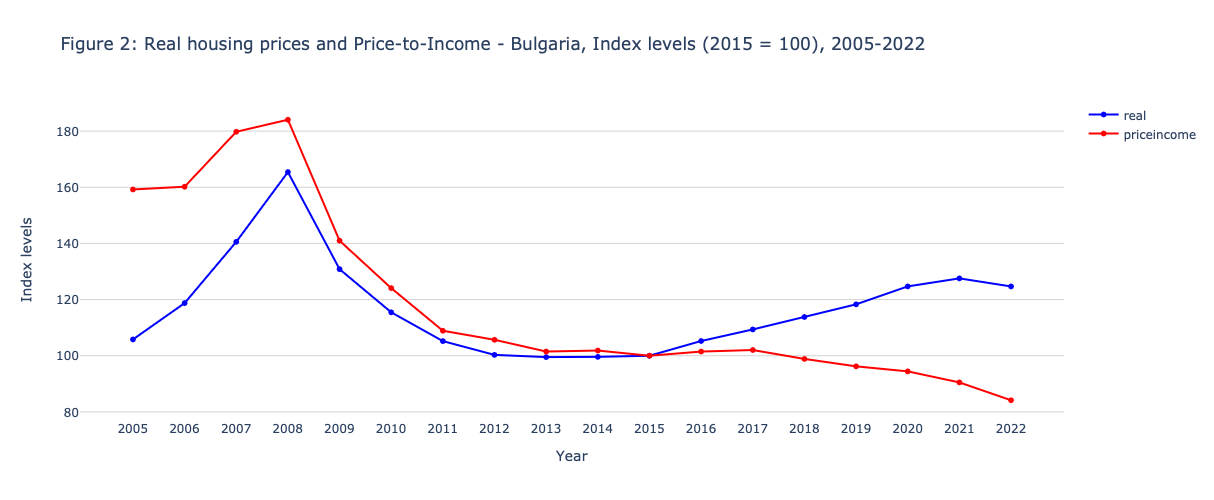

In [24]:
house_prices_plot_3(
    hpi_bg_annual,
    col1 = "real", col2 = "priceincome",
    title = "Figure 2: Real housing prices and Price-to-Income - Bulgaria, Index levels (2015 = 100), 2005-2022",
    title_x = "Year", title_y = "Index levels",
    height = 500, color1 = "blue", color2 = "red")

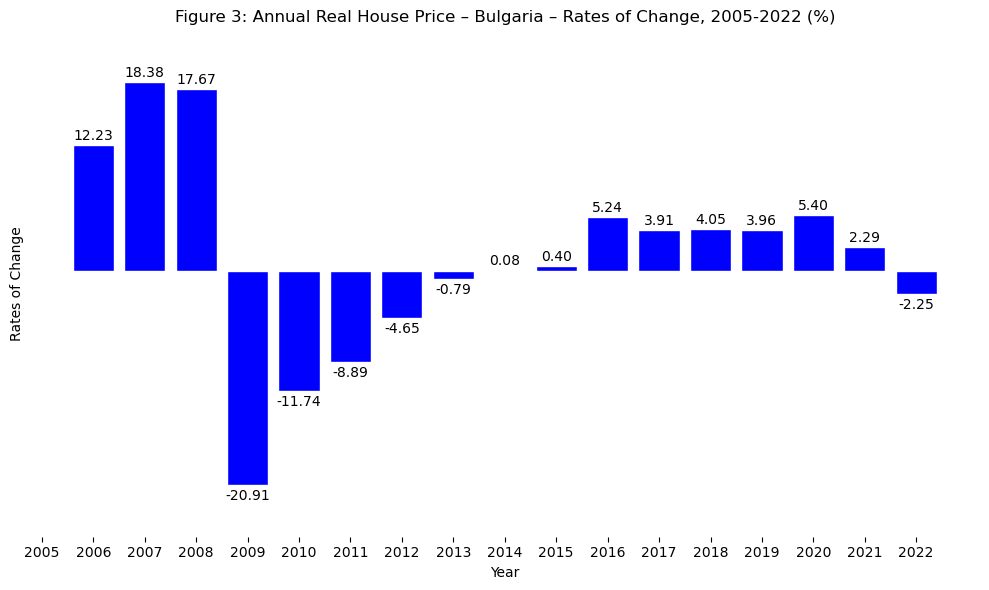

In [25]:
house_prices_plot_2(
    hpi_bg_annual, value_col = "real_YoY%",
    title = "Figure 3: Annual Real House Price – Bulgaria – Rates of Change, 2005-2022 (%)",
    title_x = "Year", title_y = "Rates of Change",
    color = "blue", edgecolor = "white")

**Interpreting Insights from Figure 2 and Figure 3**

**Phase One: Rapid Price Growth (2005-2008)**<br>
During this initial phase of the cycle, a notable surge in housing prices occurred between 2006 and 2008. The rate of price growth far exceeded inflation, leading to a sharp decline in housing affordability. Within just one year, housing became exceptionally unaffordable in the country. This trend of increasing disparities persisted for the next three years, pushing house prices significantly higher than inflation levels. **<div class="alert alert-danger">The culmination of these dynamics resulted in the formation of a housing bubble, reaching such proportions by 2008 that housing became highly unaffordable for households in Bulgaria.</div>**

**Phase Two: Downward Correction (2009-2013)**<br>
The second phase witnessed a corrective movement as housing prices experienced a consecutive five-year decline. This correction led to an improvement in housing affordability, partly influenced by the modest rise in income observed between 2009 and 2013.

**Phase Three: Moderate Growth (2014-2022)**<br>
In the third cycle, spanning from 2015 to 2022, housing prices exhibited a more moderate growth of around 30%. This phase coincided with relative economic stability and recovery after the global financial crisis. The growth observed during this period could be attributed to factors such as improved economic conditions, low interest rates, and an increasing demand for housing. Notably, the housing price growth remained below the 6% threshold throughout this duration. Consequently, housing affordability continued to improve. In the final phase of the cycle (2015-2022), the Price-to-Income Ratio (PIR) remained below the Real House Price Index (RHPI), indicating that housing had become affordable again.

#### **Exploring House Prices and Rents**

Figure 4 and Figure 5 below show the trends of house prices and rents (since 2005).

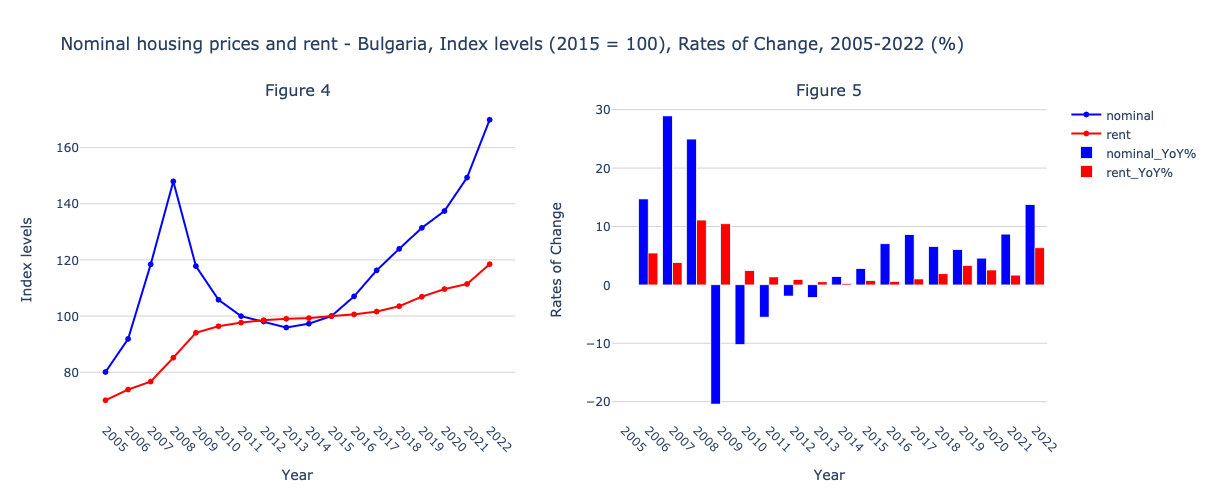

In [26]:
house_prices_plot_4(
    hpi_bg_annual,
    col1 = "nominal",
    col2 = "rent",
    col3 = "nominal_YoY%",
    col4 = "rent_YoY%",
    title = "Nominal housing prices and rent - Bulgaria, Index levels (2015 = 100), Rates of Change, 2005-2022 (%)",
    height = 500,
    subplot_title1 = "Figure 4",
    subplot_title2 = "Figure 5",
    title_x1 = "Year", title_y1 = "Index levels",
    title_x2 = "Year", title_y2 = "Rates of Change")

**Interpreting Insights from Figure 4 and Figure 5**

**Phase One: Rapid Price Growth (2005-2008)**<br>
In the initial phase, both house prices and rents experience a substantial uptick. However, it's evident that house prices surge at a significantly swifter rate than rents. The housing price index surpasses the rent index by a factor of 1.74, unequivocally indicating an unsustainable trend in housing prices. This reaffirms the conclusions we drew from our analysis of Real House Prices and Housing Affordability, underlining the presence of a housing market bubble during this period in Bulgaria.

**Phase Two: Downward Correction (2009-2013)**<br>
Moving to the second phase, house prices witness a decline, whereas rents continue to rise, albeit at a more restrained pace compared to the first cycle.

**Phase Three: Moderate Growth (2014-2022)**<br>
Transitioning to the third phase, both house prices and rents undergo growth. However, it's notable that the pace of house price growth surpasses that of rents once again by a factor of 1.43. This differential development between house prices and rents serves as another noteworthy sign, suggesting the potential unsustainability of house price trends in the third phase..

#### **Analyzing Housing Affordability through Price-to-Income and Rent-to-Income Ratios**

1. **Price-to-Income Ratio (PIR)**: The PIR measures the affordability of buying a house by comparing the house price to the income of potential buyers. A higher PIR suggests that houses are relatively more expensive compared to the income levels of buyers. This could indicate challenges for people looking to purchase homes, especially if the PIR is substantially higher than historical norms.

2. **Rent-to-Income Ratio (RIR)**: The RIR, as discussed earlier, evaluates the affordability of renting a property in relation to income. A higher RIR signifies that a significant portion of income goes towards rent, potentially making renting less affordable.

Figure 6 show the housing market's affordability dynamics (since 2005).

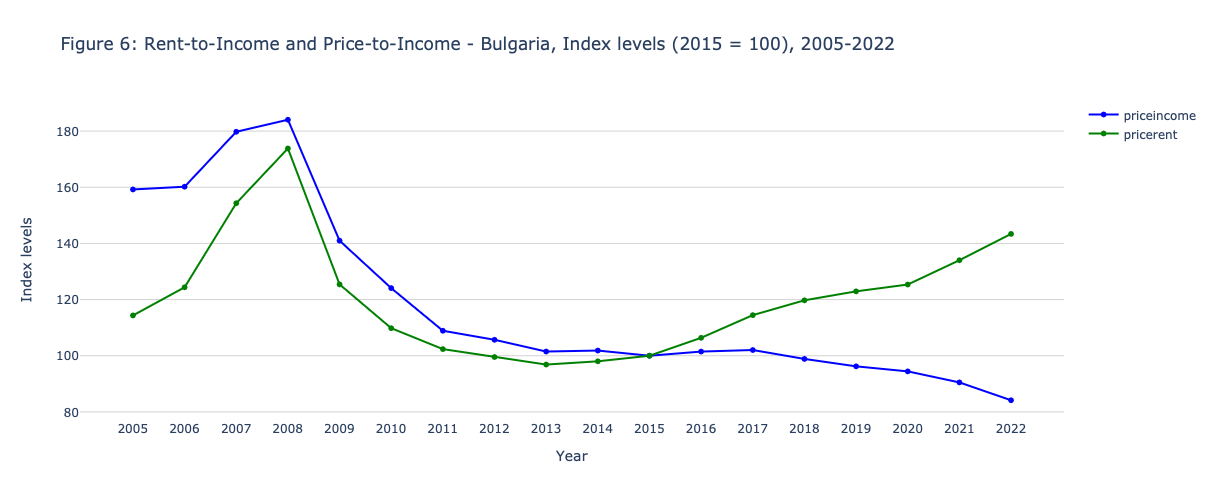

In [27]:
house_prices_plot_3(
    hpi_bg_annual,
    col1 = "priceincome", col2 = "pricerent",
    title = "Figure 6: Rent-to-Income and Price-to-Income - Bulgaria, Index levels (2015 = 100), 2005-2022",
    title_x = "Year", title_y = "Index levels",
    height = 500, color1 = "blue", color2 = "green")

**Interpreting Insights from Figure 6**

In examining the housing market's affordability dynamics, we turn our attention to two critical indicators: the Price-to-Income Ratio (PIR) and the Rent-to-Income Ratio (RIR). These ratios shed light on the balance between housing prices, income levels, and the viability of buying versus renting.

**First Phase: Affordability Strain**
During the initial cycle, both the PIR and RIR exhibit higher values, indicating that both buying and renting options are less affordable within the housing market. This is attributed to elevated housing prices relative to relatively modest income levels. This aligns with our earlier findings when analyzing Real House Prices and Housing Affordability, affirming the presence of a housing bubble during this period.

**Second Phase: Corrective Affordability Shift**
Transitioning to the second phase, we observe a decline in both PIR and RIR. This adjustment signifies an enhancement in housing affordability, driven partially by a moderate uptick in income between 2009 and 2013. Notably, the proximity of these two indicators suggests that households exhibit similar cost considerations for both buying and renting decisions.

**Third Phase: Unveiling Rental Pressures**
In the third phase, both PIR and RIR experience growth. However, the RIR registers a more rapid increase compared to the PIR, rendering rentals comparatively less affordable than home purchases. This shift prompts consumers to prefer owning over renting, effectively amplifying upward pressure on house prices during this timeframe. The Price-to-Income Ratio (PIR) and Rent-to-Income Ratio (RIR) do not display a substantial deviation from historical norms. This observation serves as an additional indicator, suggesting that the prevailing house price trends may not be indicative of unsustainability.

### **3. Dislocations Analysis**

We examine three types of dislocations or distortions in the real economy, which have historically often been associated with housing price bubbles:

1. **Credit Booms**: Housing bubbles have frequently been linked to excessive increases in credit supply to the real economy. These episodes are known as twin booms, where a housing boom coincides with a credit boom. These situations are especially concerning as they can lead to significant economic harm, including pushing the economy into a severe and prolonged recession. Studies by the IMF have shown that twin booms have been associated with either financial crises or poor economic performance in 90% of cases.

2. **Speculative Foreign Capital Inflows**: We also assess whether there are significant increases in speculative foreign capital flowing into the real estate and construction sectors. Such inflows have sometimes driven unsustainable house price developments.

3. **Construction Booms**: We investigate whether there are unsustainable booms in construction. This is assessed by focusing on data related to investments (measured by gross fixed capital formation) in dwelling construction. This helps us gauge the volume and sustainability of construction activity, which can play a role in driving or indicating potential housing bubbles.

#### **3.1. Data Sources**

For our analysis, we gathered data from various reputable sources including the Bulgarian National Statistical Institute, Bulgarian National Bank, and Eurostat. The specific datasets we utilized are as follows:

1. **Dataset from Bulgarian National Bank:**
   - Total Loans to Non-financial Corporations, Financial Corporations, Households, and NPISHs. These statistics are available annually.
   - Foreign Direct Investment in Bulgaria. This dataset provides both quarterly and annual statistics, focusing on economic activities in the Construction and Real Estate sectors.

   <br>
2. **Dataset from Bulgarian National Statistical Institute:**
   - GDP by Production Approach for the entire economy. These annual statistics are incorporated into our analysis.
   
   <br>
3. **Dataset from Eurostat Institute:**
   - Gross Fixed Capital Formation data.


#### **3.2. Data Preparation and Structuring**

 **Loans data**

In [28]:
# Loading loans data
loans = pd.read_csv("data/total_loans_bg_yrl.csv")
loans.head()

,country,time,frequency,currency,total
0,BG,2005,A,MBGN,18 029
1,BG,2006,A,MBGN,22 299
2,BG,2007,A,MBGN,36 635
3,BG,2008,A,MBGN,48 348
4,BG,2009,A,MBGN,50 080


In [29]:
# Showing a concise summary of a DataFrame
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    18 non-null     object
 1   time       18 non-null     int64 
 2   frequency  18 non-null     object
 3   currency   18 non-null     object
 4   total      18 non-null     object
dtypes: int64(1), object(4)
memory usage: 852.0+ bytes


The data column types are indeed accurate, with one exception. The "total" column, which represents numerical values, is currently categorized as an "object" data type. To address this, we undertake a modification in the data type of the "total" column. Additionally, we also adjust the data type of the "time" column to ensure seamless compatibility with the x-axis requirements. Notably, using string data types for the "time" column achieves the desired compatibility, allowing us to create accurate and meaningful visualizations. This thoughtful approach guarantees that our line plots convey the information accurately while avoiding any potential discrepancies.

In [30]:
loans.time = loans.time.astype(str)
loans.time.dtypes

dtype('O')

In [31]:
loans.total = loans.total.str.replace(' ', '').astype(float)

In [32]:
loans.total.dtypes

dtype('float64')

In [33]:
# Renaming columns for better readability
loans.rename(columns = {"total":"outsdanding_loans", "time":"year"}, inplace = True)

**GDP data**

To facilitate our study, we must calculate the annual change in outstanding loans and FDI inflow in Construction and Real estate sectors as a percentage of GDP. In order to proceed with this calculation, we will import the GDP data into our analysis.

In [34]:
# Loading GDP data
gdp = pd.read_csv("data/GDP_BG_yrl.csv")
gdp.head()

,country,time,frequency,currency,gdp
0,BG,2005,A,MBGN,47017
1,BG,2006,A,MBGN,53608
2,BG,2007,A,MBGN,63455
3,BG,2008,A,MBGN,72790
4,BG,2009,A,MBGN,73181


In [35]:
# Showing a concise summary of a DataFrame
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    18 non-null     object
 1   time       18 non-null     int64 
 2   frequency  18 non-null     object
 3   currency   18 non-null     object
 4   gdp        18 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 852.0+ bytes


The data column types are indeed accurate.We adjust the data type of the "time" column to ensure seamless compatibility with the x-axis requirements. Notably, using string data types for the "time" column achieves the desired compatibility, allowing us to create accurate and meaningful visualizations. This thoughtful approach guarantees that our line plots convey the information accurately while avoiding any potential discrepancies.

In [36]:
gdp.time = gdp.time.astype(str)
gdp.time.dtypes

dtype('O')

In [37]:
# Renaming columns for better readability
gdp.rename(columns = {"time":"year"}, inplace = True)

**Merging the datasets** *(loans data with GDP data)*

In [38]:
loans_gdp = pd.merge(loans, gdp)
loans_gdp.head()

,country,year,frequency,currency,outsdanding_loans,gdp
0,BG,2005,A,MBGN,18029.0,47017
1,BG,2006,A,MBGN,22299.0,53608
2,BG,2007,A,MBGN,36635.0,63455
3,BG,2008,A,MBGN,48348.0,72790
4,BG,2009,A,MBGN,50080.0,73181


"We perform calculations to determine the percentage change of the outstanding loans from the previous year. This process provides us with the year-to-year growth rates. Additionally, we calculate the annual change in outstanding loans as a percentage of GDP.

In [39]:
loans_gdp["outsdanding_loans_YoY%"] = loans_gdp["outsdanding_loans"].pct_change() * 100
loans_gdp["loans_to_gdp"] = loans_gdp["outsdanding_loans"].diff() / loans_gdp["gdp"] * 100

In [40]:
loans_gdp.head()

,country,year,frequency,currency,outsdanding_loans,gdp,outsdanding_loans_YoY%,loans_to_gdp
0,BG,2005,A,MBGN,18029.0,47017,NaN,NaN
1,BG,2006,A,MBGN,22299.0,53608,23.684065,7.965229
2,BG,2007,A,MBGN,36635.0,63455,64.289878,22.592388
3,BG,2008,A,MBGN,48348.0,72790,31.972158,16.091496
4,BG,2009,A,MBGN,50080.0,73181,3.582361,2.366735


**FDI data**

In [41]:
# Loading FDI data
fdi = pd.read_csv("data/fdi_F_L_bg.csv")
fdi

,country,time,frequency,economic_activity,value,series_denominated
0,BG,2006-Q1,Q,Real estate,1461.4,MEUR
1,BG,2006-Q2,Q,Real estate,1948.9,MEUR
2,BG,2006-Q3,Q,Real estate,2481.9,MEUR
3,BG,2006-Q4,Q,Real estate,2853.3,MEUR
4,BG,2007-Q1,Q,Real estate,3029.1,MEUR
...,...,...,...,...,...,...
169,BG,2018,A,Construction,1172.7,MEUR
170,BG,2019,A,Construction,1118.7,MEUR
171,BG,2020,A,Construction,1020.5,MEUR
172,BG,2021,A,Construction,719.6,MEUR


In [42]:
# Showing a concise summary of a DataFrame
fdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             174 non-null    object 
 1   time                174 non-null    object 
 2   frequency           174 non-null    object 
 3   economic_activity   174 non-null    object 
 4   value               174 non-null    float64
 5   series_denominated  174 non-null    object 
dtypes: float64(1), object(5)
memory usage: 8.3+ KB


The data column types are accurate and we don't modify the data type.

In [43]:
# Selecting annual data for FDI
fdi = fdi[fdi["frequency"] == "A"]

We will reformat the original dataset into a wide format using a pivot operation. This reformatting will create specific columns for our key variables of interest, which are as follows:
- `Real estate`: This column will represent the Foreign Direct Investment (FDI) in Real Estate activities, expressed as stocks.
- `Construction`: This column will capture the Foreign Direct Investment (FDI) in Construction activities, also presented as stocks.

In [44]:
# Pivoting the data to have variables as columns
fdi_pivoted = fdi.pivot(
    index = ["time", "country", "series_denominated"],
    columns = "economic_activity", values = "value")

In [45]:
fdi_data = fdi_pivoted.reset_index()
fdi_data.head()

economic_activity,time,country,series_denominated,Construction,Real estate
0,2005,BG,MEUR,338.6,1119.7
1,2006,BG,MEUR,867.4,2853.3
2,2007,BG,MEUR,1880.2,5350.0
3,2008,BG,MEUR,2335.9,7520.7
4,2009,BG,MEUR,2676.3,8118.1


In [46]:
# Renaming columns for better readability
fdi_data.rename(columns = {"time":"year"}, inplace = True)

**Merging the datasets** *(FDI data with GDP data)*

In [47]:
fdi_gdp = pd.merge(fdi_data, gdp, on = ["country", "year"])
fdi_gdp.head()

,year,country,series_denominated,Construction,Real estate,frequency,currency,gdp
0,2005,BG,MEUR,338.6,1119.7,A,MBGN,47017
1,2006,BG,MEUR,867.4,2853.3,A,MBGN,53608
2,2007,BG,MEUR,1880.2,5350.0,A,MBGN,63455
3,2008,BG,MEUR,2335.9,7520.7,A,MBGN,72790
4,2009,BG,MEUR,2676.3,8118.1,A,MBGN,73181


We conduct a series of calculations to ascertain the percentage change in the Foreign Direct Investment (FDI) inflow within the Construction and Real estate sectors from the previous year. This meticulous process furnishes us with the growth rates on a year-to-year basis for each respective variable. Additionally, we embark on determining the annual alteration in FDI inflow for the Construction and Real estate sectors as a percentage of the Gross Domestic Product (GDP).

In order to ensure consistency, we transform the values present in the 'Construction' and 'Real estate' columns, originally denominated in Million Euros (MEUR), into Million Bulgarian Lev (MBGN). This conversion is executed by utilizing the exchange rate of 1 EUR = 1.95583 BGN.".

In [48]:
exchange_rate = 1.95583
columns_to_convert = ["Construction", "Real estate"]

fdi_gdp[columns_to_convert] = fdi_gdp[columns_to_convert].apply(lambda x: x * exchange_rate)

In [49]:
# Droping the column series_denominated
fdi_gdp.drop(["series_denominated"], axis = 1, inplace = True)

In [50]:
columns_to_pct_change = ["Construction", "Real estate"]
diff_column_suffix = "YoY%"

for col in columns_to_pct_change:
    new_col_name = f"{col}_{diff_column_suffix}"
    fdi_gdp[new_col_name] = fdi_data[col].pct_change() * 100

In [51]:
sectors = ["Construction", "Real estate"]
gdp_column = "gdp"

for sector in sectors:
    fdi_gdp[f"fdi_to_gdp_{sector.lower()}"] = fdi_gdp[sector].diff() / fdi_gdp[gdp_column] * 100

In [52]:
# sectors = ["Construction", "Real estate"]
# gdp_column = "gdp"

# fdi_gdp[[f"fdi-to-gdp_{sector.lower()}" for sector in sectors]] = [
#     fdi_gdp[sector].diff() / fdi_gdp[gdp_column] * 100 for sector in sectors
# ]


In [53]:
fdi_gdp.head()

,year,country,Construction,Real estate,frequency,currency,gdp,Construction_YoY%,Real estate_YoY%,fdi_to_gdp_construction,fdi_to_gdp_real estate
0,2005,BG,662.244038,2189.942851,A,MBGN,47017,NaN,NaN,NaN,NaN
1,2006,BG,1696.486942,5580.569739,A,MBGN,53608,156.172475,154.827186,1.929270,6.324852
2,2007,BG,3677.351566,10463.690500,A,MBGN,63455,116.762739,87.502190,3.121684,7.695407
3,2008,BG,4568.623297,14709.210681,A,MBGN,72790,24.236783,40.573832,1.224443,5.832560
4,2009,BG,5234.387829,15877.623523,A,MBGN,73181,14.572542,7.943410,0.909751,1.596607


**Gross fixed capital formation (GFCF) data**

First, we instantiate a pandasdmx.Request object, using the string ID of a data source supported by pandaSDMX

In [54]:
estat = sdmx.Request("ESTAT")

The object ESTAT is now ready to make multiple data and metadata queries to the Eurostat’s web service.

Configure the HTTP connection

pandaSDMX builds on the widely-used requests Python HTTP library. To pre-configure all queries made by a Request, we pass any of the keyword arguments recognized by requests.request(). For example, a proxy server can be specified:

In [55]:
estat_via_proxy = sdmx.Request(
    "ESTAT",
    proxies={"http": "http://1.2.3.4:5678"}
)

The session attribute is a familiar requests.Session object that can be used to inspect and modify configuration between queries:

In [56]:
estat_via_proxy.session.proxies

{'http': 'http://1.2.3.4:5678'}

**Obtaining and exploring metadata**

We get information about the source’s data flows

In [57]:
flow_msg = estat.dataflow()

All the content of the response—SDMX data and metadata objects—has been parsed and is accessible from flow_msg. We have received

In [58]:
flow_msg

<pandasdmx.StructureMessage>
  <Header>
    id: 'DF1692867654'
    prepared: '2023-08-24T11:00:54.514000+02:00'
    sender: <Agency ESTAT>
    source: 
    test: False
  response: <Response [200]>
  DataflowDefinition (7358): MAR_QG_QM_PWHB MAR_QG_QM_PWHC MAR_QG_QM_PW...
  DataStructureDefinition (7032): MAR_QG_QM_PWHB MAR_QG_QM_PWHC MAR_QG_...

We convert metadata to pandas.Series

In [59]:
dataflows = sdmx.to_pandas(flow_msg.dataflow)

We are interested in Gross fixed capital formation, we'll use Pandas' built-in methods to find a suitable data stream:

In [60]:
dataflows[dataflows.str.contains("Gross fixed capital formation", case = False)]

NAMA_10R_2GFCF      Gross fixed capital formation by NUTS 2 regions
NAMA_10_AN6       Gross fixed capital formation by AN_F6 asset type
NAMA_10_NFA_FL    Cross-classification of gross fixed capital fo...
NAMQ_10_AN6       Gross fixed capital formation with AN_F6 asset...
TIPSNA20            Gross fixed capital formation at current prices
TEC00011                Gross fixed capital formation (investments)
TEINA040              Gross fixed capital formation, current prices
TEINA041                     Gross fixed capital formation, volumes
TEINA042          Gross fixed capital formation by asset (AN_F6)...
TEINA043          Gross fixed capital formation by asset (AN_F6)...
TEINA210          General government gross fixed capital formati...
ENV_AC_EXP3       Environmental protection expenditure - % of po...
dtype: object

For the purposes of our study we will use the folloeing database - NAMA_10_AN6 Gross fixed capital formation by AN_F6 asset type.<br>
We will download the data flow definition with the ID ‘NAMA_10_AN6’ from the Eurostat. Now we will pass the data flow ID ‘NAMA_10_AN6’, which prompts pandaSDMX to set the references query parameter to ‘all’. The ESTAT SDMX service responds by returning all metadata related to the dataflow:

In [61]:
gfcf_msg = estat.dataflow("NAMA_10_AN6")

In [62]:
gfcf_msg.response.url

'https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/dataflow/ESTAT/NAMA_10_AN6?references=descendants'

In [63]:
gfcf_msg

<pandasdmx.StructureMessage>
  <Header>
    id: 'DF1692478748'
    prepared: '2023-08-19T20:59:08.130000+00:00'
    sender: <Agency ESTAT>
    source: 
    test: False
  response: <Response [200]>
  Codelist (5): FREQ UNIT ASSET10 GEO OBS_FLAG
  ConceptScheme (1): NAMA_10_AN6
  DataflowDefinition (1): NAMA_10_AN6
  DataStructureDefinition (1): NAMA_10_AN6

In [64]:
gfcf_flow = gfcf_msg.dataflow.NAMA_10_AN6

Exploring the dsd_gfcf

In [65]:
dsd_gfcf = gfcf_flow.structure

In [66]:
dsd_gfcf.dimensions.components

[<Dimension freq>,
 <Dimension unit>,
 <Dimension asset10>,
 <Dimension geo>,
 <TimeDimension TIME_PERIOD>]

In [67]:
dsd_gfcf.attributes.components

[<DataAttribute OBS_FLAG>]

In [68]:
dsd_gfcf.measures.components

[<PrimaryMeasure OBS_VALUE>]

We construct a selection key for a query

In [69]:
key = dict(geo = ["BG"])

We also set a start period to exclude older data

In [70]:
params = dict(startPeriod = "2005")

Finally, we request the data in generic format

In [71]:
data_msg = estat.data("NAMA_10_AN6", key = key, params = params)

2023-08-24 23:59:17,505 pandasdmx.reader.sdmxml - INFO: Use supplied dsd=… argument for non–structure-specific message


In [72]:
data_msg.response.headers["content-type"]

'application/vnd.sdmx.genericdata+xml;version=2.1'

In [73]:
data = data_msg.data[0]

Our focus lies on the Gross Fixed Capital Formation of dwellings as a percentage of the Gross Domestic Product (GDP). To determine the unit of measure code and the asset code associated with this data, we will make use of a dictionary provided by Eurostat. This dictionary contains the relevant unit codes and asset classifications used in their statistical database, assisting us in accurately interpreting and analyzing the data.

In [74]:
unit = pd.read_csv("https://dd.eionet.europa.eu/vocabulary/eurostat/unit/csv")
unit.head()

,URI,Label,Definition,Notation,Status,AcceptedDate,skos:exactMatch
0,http://dd.eionet.europa.eu/vocabulary/eurostat...,Number,NaN,NBR,invalid,2013-09-24,NaN
1,http://dd.eionet.europa.eu/vocabulary/eurostat...,Number,NaN,NR,valid,2013-09-24,NaN
2,http://dd.eionet.europa.eu/vocabulary/eurostat...,Number per inhabitant,NaN,NR_HAB,valid,2013-09-24,NaN
3,http://dd.eionet.europa.eu/vocabulary/eurostat...,Number per GDP,NaN,NR_GDP,invalid,2013-09-24,NaN
4,http://dd.eionet.europa.eu/vocabulary/eurostat...,Thousands,NaN,1000,invalid,2013-09-24,NaN


In [75]:
unit_gdp = unit[unit["Label"] == "Percentage of gross domestic product (GDP)"]
unit_gdp

,URI,Label,Definition,Notation,Status,AcceptedDate,skos:exactMatch
131,http://dd.eionet.europa.eu/vocabulary/eurostat...,Percentage of gross domestic product (GDP),NaN,PC_GDP,valid,2013-09-24,NaN


In [76]:
asset10 = pd.read_csv("https://dd.eionet.europa.eu/vocabulary/eurostat/asset10/csv")
asset10.head()

,URI,Label,Definition,Notation,Status,AcceptedDate
0,http://dd.eionet.europa.eu/vocabulary/eurostat...,Produced non-financial assets (net),NaN,N1N,valid,2014-09-04
1,http://dd.eionet.europa.eu/vocabulary/eurostat...,Fixed assets and inventories (net),NaN,N1ON,valid,2014-09-04
2,http://dd.eionet.europa.eu/vocabulary/eurostat...,Total fixed assets (net),NaN,N11N,valid,2014-09-04
3,http://dd.eionet.europa.eu/vocabulary/eurostat...,Total Construction (net),NaN,N11KN,valid,2014-09-04
4,http://dd.eionet.europa.eu/vocabulary/eurostat...,Dwellings (net),NaN,N111N,valid,2014-09-04


In [77]:
asset10_dwellings = asset10[asset10["Label"] == "Dwellings (gross)"]
asset10_dwellings

,URI,Label,Definition,Notation,Status,AcceptedDate
34,http://dd.eionet.europa.eu/vocabulary/eurostat...,Dwellings (gross),NaN,N111G,valid,2014-09-04


From dataset "NAMA_10_AN6", we select the "Dwellings" (asset10=N111G) and unit of mesure Percentage of gross domestic product(unit=PC_GDP)

In [78]:
annual_data = [u for sk, u in data.series.items() if sk.unit == "PC_GDP"] 
gfcf_data = pd.concat(sdmx.to_pandas(annual_data)).unstack()

In [79]:
gfcf_data = gfcf_data.reset_index().head()

In [80]:
gfcf_data

TIME_PERIOD,freq,unit,asset10,geo,2005,2006,2007,2008,2009,2010,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,A,PC_GDP,N111G,BG,3.0,5.5,5.0,5.8,4.7,2.7,...,1.7,1.6,1.4,2.7,2.8,2.7,2.8,2.9,2.8,2.5
1,A,PC_GDP,N112G,BG,8.0,7.9,7.9,12.3,13.6,11.2,...,9.9,9.1,8.7,6.7,5.9,5.9,5.0,5.1,3.9,3.8
2,A,PC_GDP,N1131G,BG,5.8,4.5,5.3,3.0,1.0,0.9,...,1.1,1.8,1.4,1.4,1.1,1.3,1.3,1.1,1.1,1.0
3,A,PC_GDP,N1132G,BG,1.1,1.4,1.9,2.5,0.8,1.1,...,0.7,0.6,0.2,0.2,0.2,0.1,0.4,0.1,0.1,NaN
4,A,PC_GDP,N115G,BG,0.2,0.3,0.3,0.2,0.1,0.2,...,0.1,0.2,0.1,0.1,0.1,0.2,0.1,0.1,0.1,0.1


In [81]:
# Selecting data for dwellings
gfcf_dwellings = gfcf_data[gfcf_data["asset10"] == "N111G"]
gfcf_dwellings

TIME_PERIOD,freq,unit,asset10,geo,2005,2006,2007,2008,2009,2010,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,A,PC_GDP,N111G,BG,3.0,5.5,5.0,5.8,4.7,2.7,...,1.7,1.6,1.4,2.7,2.8,2.7,2.8,2.9,2.8,2.5


In [82]:
# Melt the DataFrame
gfcf_dwellings = gfcf_dwellings.melt(
    id_vars = ["freq", "unit", "asset10", "geo"],
    value_vars = gfcf_dwellings.columns[4:],
    var_name = "year",
    value_name = "value"
) 

In [83]:
gfcf_dwellings.head()

,freq,unit,asset10,geo,year,value
0,A,PC_GDP,N111G,BG,2005,3.0
1,A,PC_GDP,N111G,BG,2006,5.5
2,A,PC_GDP,N111G,BG,2007,5.0
3,A,PC_GDP,N111G,BG,2008,5.8
4,A,PC_GDP,N111G,BG,2009,4.7


In [84]:
gfcf_dwellings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   freq     18 non-null     object 
 1   unit     18 non-null     object 
 2   asset10  18 non-null     object 
 3   geo      18 non-null     object 
 4   year     18 non-null     object 
 5   value    18 non-null     float64
dtypes: float64(1), object(5)
memory usage: 996.0+ bytes


In [85]:
# Droping unnecessary columns from DataFream
gfcf_dwellings.drop(
    ["unit",
     "asset10"],
    axis=1, inplace=True)

In [86]:
# Renaming columns for better readability
gfcf_dwellings.rename(
    columns={"geo": "country_code_2",
             "freq": "frequency",
             "value": "gfcf_to_gpd"},
    inplace=True)

In [87]:
gfcf_dwellings.head()

,frequency,country_code_2,year,gfcf_to_gpd
0,A,BG,2005,3.0
1,A,BG,2006,5.5
2,A,BG,2007,5.0
3,A,BG,2008,5.8
4,A,BG,2009,4.7


#### **3.3. Data Visualization and Exploration**

#### **Exploring of Credit Volume as a Share of GDP**

We have utilized time series plots to effectively visualize the evolution of credit volume over the years, complemented by growth rate visualizations to reveal inherent patterns and variations.

As depicted in Figure 7 and Figure 8 below, we present the trends in credit volume as outstanding loans, along with the percentage change of outstanding loans compared to the previous year. This approach allows us to discern year-to-year growth rates, as well as the annual changes in outstanding loans as a proportion of GDP, spanning from the year 2005.


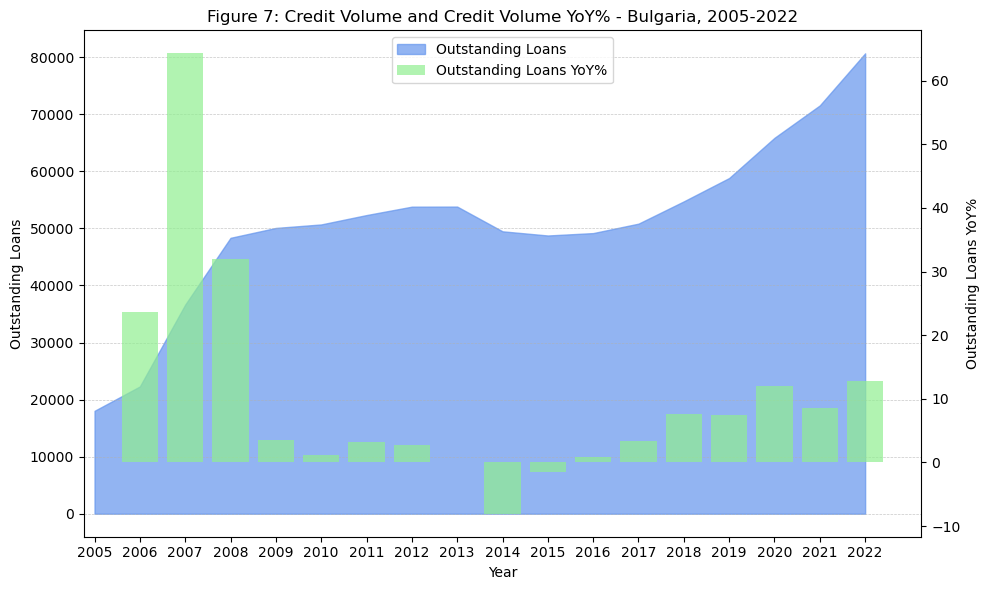

In [88]:
fig, ax1 = plt.subplots(figsize = (10, 6))
fig.patch.set_facecolor("white") 

ax1.fill_between(
    loans_gdp["year"],
    loans_gdp["outsdanding_loans"],
    color = "cornflowerblue",
    alpha = 0.7,
    label = "Outstanding Loans")

ax1.set_ylabel("Outstanding Loans")
ax1.set_xlabel("Year")

ax1.grid(
    axis = "y",
    linestyle = "--",
    linewidth = 0.5,
    alpha = 0.7)

ax1.spines["top"].set_color("none")
ax1.spines["bottom"].set_color("none")
ax1.spines["right"].set_color("none")
ax1.spines["left"].set_color("none")

ax2 = ax1.twinx()

bars = ax2.bar(
    loans_gdp["year"],
    loans_gdp["outsdanding_loans_YoY%"],
    color = "lightgreen",
    alpha = 0.7,
    label = "Outstanding Loans YoY%")

ax2.set_ylabel("Outstanding Loans YoY%")

# for bar in bars:
#     yval = bar.get_height()
#     posx = bar.get_x() + bar.get_width() / 2
#     posy = yval
    # ax2.text(
    #     posx, posy, round(yval, 2),
    #     ha='center', va='bottom', 
    #     fontsize=10, color='black'
    # )

ax2.grid(False)

ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()

ax1.set_xticks(loans_gdp["year"])
ax1.set_xticklabels(loans_gdp["year"], ha = "center")

ax1.grid(which = "both", axis = "x", linewidth = 0)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(
    lines + lines2, labels + labels2,
    loc = "upper center"
)

plt.title("Figure 7: Credit Volume and Credit Volume YoY% - Bulgaria, 2005-2022")
plt.tight_layout()  
plt.show()


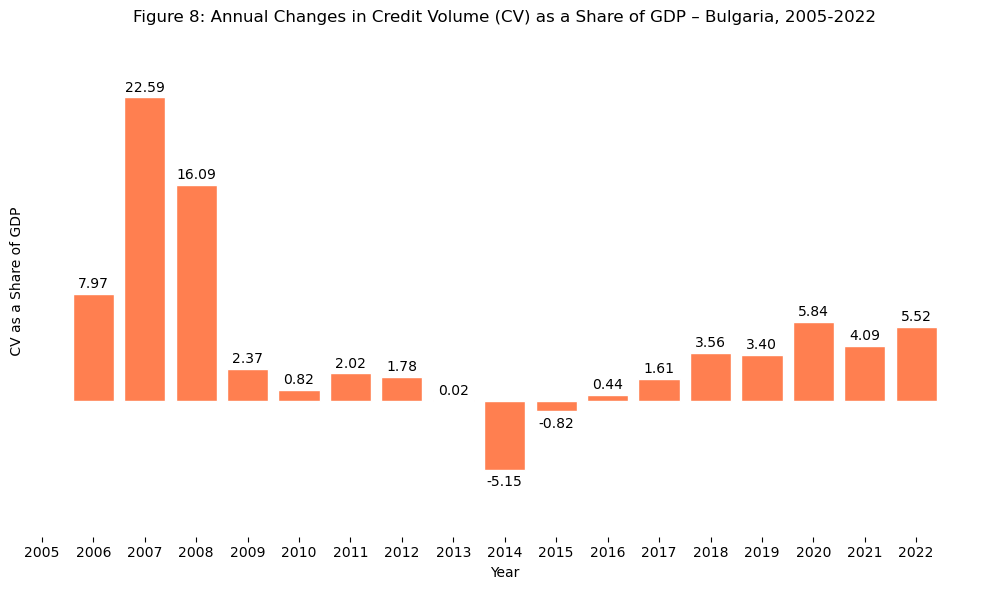

In [89]:
house_prices_plot_2(
   loans_gdp, value_col = "loans_to_gdp",
    title = "Figure 8: Annual Changes in Credit Volume (CV) as a Share of GDP – Bulgaria, 2005-2022",
     title_x = "Year", title_y = " CV as a Share of GDP",
    color = "coral", edgecolor = "white")

**Interpreting Insights from Figure 7 and Figure 8**

**First Phase:** In the initial cycle, we observe an excessive supply of credit. Rapid growth in housing prices coincides with a notable surge in credit supply to the real economy. This corresponds to our earlier observations when examining Real House Prices and Housing Affordability, indicating the presence of a housing bubble during this period.

**Second Phase:** Following the bubble, a period of deleveraging is observed.

**Third Phase:** In the subsequent housing cycle marked by rapid price growth, there is no significant surge in credit supply to the real economy.

#### **Exploring Foreign Direct Investment (FDI) in Real Estate and Construction as a Percentage of GDP**

As illustrated in Figure 9 below, we delve into the yearly alterations in Foreign Direct Investment (FDI) inflow within the Construction and Real Estate sectors, as a proportion of the Gross Domestic Product (GDP).

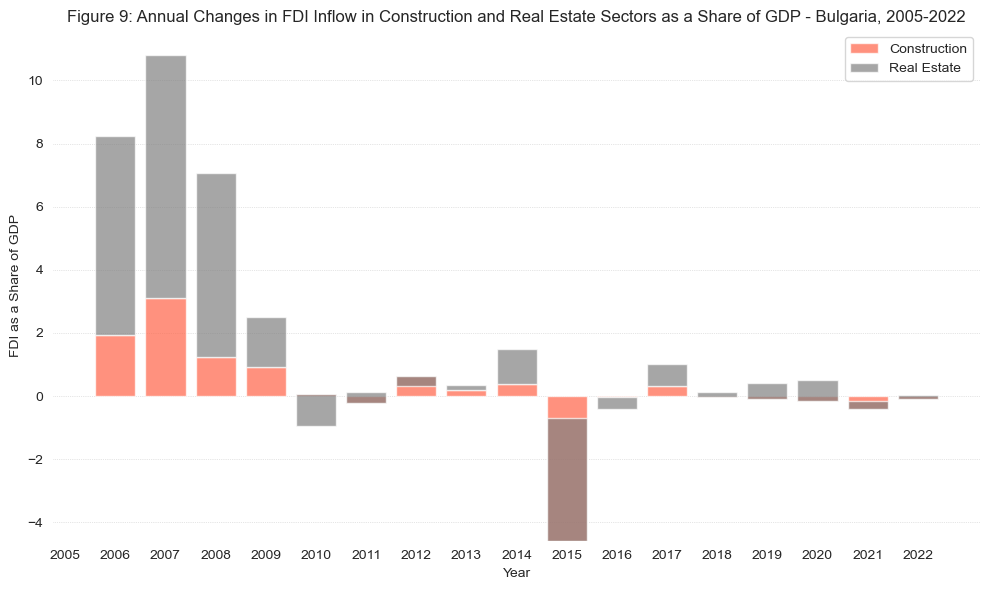

In [90]:
sns.set_style("whitegrid")

plt.figure(figsize = (10, 6))
ax = plt.gca()

construction_color = "tomato"
real_estate_color = "grey"


bars_construction = plt.bar(
    fdi_gdp["year"], fdi_gdp["fdi_to_gdp_construction"],
    color = construction_color, label = "Construction", alpha = 0.7)

bars_real_estate = plt.bar(
    fdi_gdp["year"], fdi_gdp["fdi_to_gdp_real estate"],
    bottom = fdi_gdp["fdi_to_gdp_construction"],
    color = real_estate_color, label = "Real Estate", alpha = 0.7)

plt.xlabel("Year")
plt.ylabel("FDI as a Share of GDP")
plt.title("Figure 9: Annual Changes in FDI Inflow in Construction and Real Estate Sectors as a Share of GDP - Bulgaria, 2005-2022")
plt.xticks(ha = "center")
plt.legend()

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.grid(axis = "x")
plt.grid(axis = "y", linestyle = "dotted", linewidth = 0.5)

plt.tight_layout()
plt.show()


**Interpreting Insights from Figure 9**

**First Phase(2005-2008):** Within this cycle, a pronounced surge in FDI flows within the Construction and Real Estate Sectors as a Share of GDP is evident during the expansion phase. The rapid appreciation of housing prices aligns with a substantial influx of FDI flows into the real economy. This finding aligns with our earlier observations when analyzing Real House Prices and Housing Affordability, providing further evidence of a housing bubble during this period.

**Second Phase(2009-2022):** Subsequent to the global crisis, a decline in inflows becomes apparent, signaling a notable reduction in foreign direct investment.

#### **Exploring Gross fixed capital formation (GFCF) in construction of dwellings as a Share of GDP**

As illustrated in Figure 10 below, we delve into the yearly alterations in Gross fixed capital formation (GFCF) within construction of dwellings, as a proportion of the Gross Domestic Product (GDP).

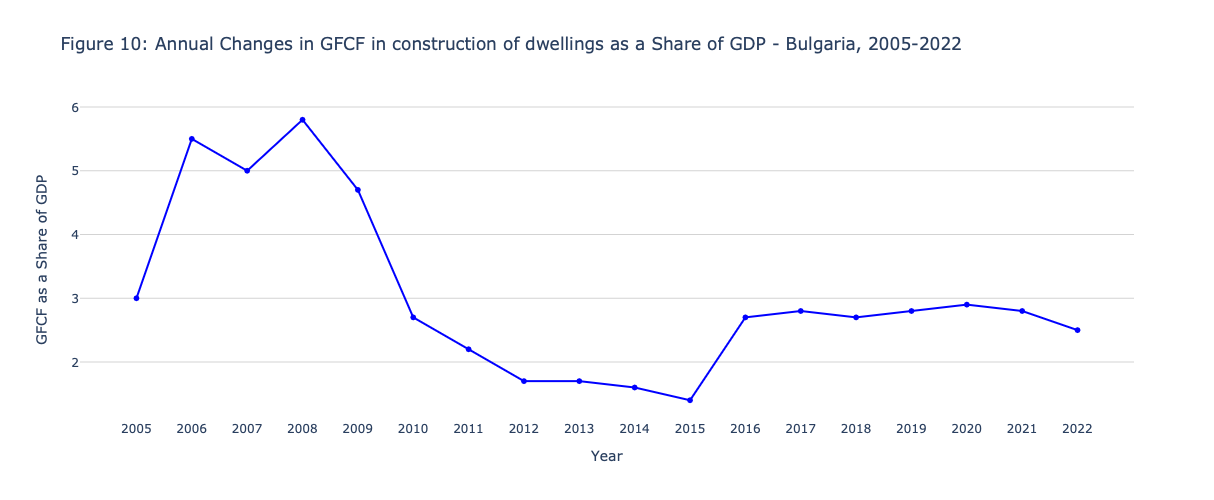

In [91]:
house_prices_plot_1(
    data = gfcf_dwellings,
    col = "gfcf_to_gpd",
    title = "Figure 10: Annual Changes in GFCF in construction of dwellings as a Share of GDP - Bulgaria, 2005-2022",
    title_x = "GFCF as a Share of GDP", title_y = "Year",
    height=500, color = "blue")

**Interpreting Insights from Figure 10**

The portrayal of Annual Changes in Gross Fixed Capital Formation (GFCF) in the construction of dwellings as a Share of GDP reaffirms Bulgaria's cyclical economic narrative. Particularly noteworthy is the year 2016, which witnessed a substantial and robust increase in GFCF. This marked the inception of a new cycle, signaling a pivotal turning point in the economic trajectory.

### 4. Descriptive Statistics and Correlation Analysis

We performe descriptive statistics and correlation analysis. We start by calculating descriptive statistics for variables  - `Nominal House Price Index, Price-to-Income Ratio, Real House Price Index, Price-to-Rent Ratio, Rent Prices Index`, `Credit Volume (CV)`, `FDI Inflow in Construction and Real Estate Sectors` and `GFCF in construction of dwellings` such as `mean`, `standard deviation`, `minimum`, `maximum`, `kurtosis`, and `skewness`. Afterward, we perform a correlation analysis to understand the relationships between these variables. This analysis helps ous gain insights into the data and identify potential patterns or trends.

#### 4.1. Data Preparation and Structuring

In [92]:
# Merge datasets for descriptive statistics
merge_data_1 = hpi_bg_annual[
    ["year", "country_name", "country_code_2",
     "country_code_3","nominal", "priceincome",
     "pricerent", "real", "rent", "nominal_YoY%",
     "priceincome_YoY%", "pricerent_YoY%", "real_YoY%", "rent_YoY%"]
]

merge_data_2 = pd.merge(merge_data_1, loans_gdp)

merge_data_3 = pd.merge(merge_data_2, fdi_gdp)

hpi_datasets = pd.merge(merge_data_3, gfcf_dwellings)

hpi_datasets.head()

,year,country_name,country_code_2,country_code_3,nominal,priceincome,pricerent,real,rent,nominal_YoY%,...,gdp,outsdanding_loans_YoY%,loans_to_gdp,Construction,Real estate,Construction_YoY%,Real estate_YoY%,fdi_to_gdp_construction,fdi_to_gdp_real estate,gfcf_to_gpd
0,2005,Bulgaria,BG,BGR,80.0850,159.211295,114.342789,105.799615,70.018417,NaN,...,47017,NaN,NaN,662.244038,2189.942851,NaN,NaN,NaN,NaN,3.0
1,2006,Bulgaria,BG,BGR,91.8575,160.188191,124.373069,118.735397,73.826846,14.700006,...,53608,23.684065,7.965229,1696.486942,5580.569739,156.172475,154.827186,1.929270,6.324852,5.5
2,2007,Bulgaria,BG,BGR,118.4200,179.757267,154.307470,140.562834,76.665250,28.917073,...,63455,64.289878,22.592388,3677.351566,10463.690500,116.762739,87.502190,3.121684,7.695407,5.0
3,2008,Bulgaria,BG,BGR,147.9725,184.036845,173.812776,165.398835,85.165462,24.955666,...,72790,31.972158,16.091496,4568.623297,14709.210681,24.236783,40.573832,1.224443,5.832560,5.8
4,2009,Bulgaria,BG,BGR,117.7850,140.973082,125.408003,130.821627,94.059851,-20.400750,...,73181,3.582361,2.366735,5234.387829,15877.623523,14.572542,7.943410,0.909751,1.596607,4.7


In [93]:
# Coping dataset
hpi_datasets_copy = hpi_datasets.copy()

In [94]:
hpi_datasets_copy.columns

Index(['year', 'country_name', 'country_code_2', 'country_code_3', 'nominal',
       'priceincome', 'pricerent', 'real', 'rent', 'nominal_YoY%',
       'priceincome_YoY%', 'pricerent_YoY%', 'real_YoY%', 'rent_YoY%',
       'country', 'frequency', 'currency', 'outsdanding_loans', 'gdp',
       'outsdanding_loans_YoY%', 'loans_to_gdp', 'Construction', 'Real estate',
       'Construction_YoY%', 'Real estate_YoY%', 'fdi_to_gdp_construction',
       'fdi_to_gdp_real estate', 'gfcf_to_gpd'],
      dtype='object')

In [95]:
# Droping non numeric columns, exept "year" column
hpi_datasets_copy.drop(
    ["country_name", "country_code_2", "country_code_3",
    "country", "frequency", "currency"],
    axis=1, inplace=True)

hpi_datasets_copy.head()

,year,nominal,priceincome,pricerent,real,rent,nominal_YoY%,priceincome_YoY%,pricerent_YoY%,real_YoY%,...,gdp,outsdanding_loans_YoY%,loans_to_gdp,Construction,Real estate,Construction_YoY%,Real estate_YoY%,fdi_to_gdp_construction,fdi_to_gdp_real estate,gfcf_to_gpd
0,2005,80.0850,159.211295,114.342789,105.799615,70.018417,NaN,NaN,NaN,NaN,...,47017,NaN,NaN,662.244038,2189.942851,NaN,NaN,NaN,NaN,3.0
1,2006,91.8575,160.188191,124.373069,118.735397,73.826846,14.700006,0.613584,8.772115,12.226681,...,53608,23.684065,7.965229,1696.486942,5580.569739,156.172475,154.827186,1.929270,6.324852,5.5
2,2007,118.4200,179.757267,154.307470,140.562834,76.665250,28.917073,12.216304,24.068233,18.383260,...,63455,64.289878,22.592388,3677.351566,10463.690500,116.762739,87.502190,3.121684,7.695407,5.0
3,2008,147.9725,184.036845,173.812776,165.398835,85.165462,24.955666,2.380754,12.640545,17.668967,...,72790,31.972158,16.091496,4568.623297,14709.210681,24.236783,40.573832,1.224443,5.832560,5.8
4,2009,117.7850,140.973082,125.408003,130.821627,94.059851,-20.400750,-23.399533,-27.848800,-20.905351,...,73181,3.582361,2.366735,5234.387829,15877.623523,14.572542,7.943410,0.909751,1.596607,4.7


In [96]:
hpi_datasets_copy.year = hpi_datasets_copy.year.astype(float)

In [97]:
hpi_datasets_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     18 non-null     float64
 1   nominal                  18 non-null     float64
 2   priceincome              18 non-null     float64
 3   pricerent                18 non-null     float64
 4   real                     18 non-null     float64
 5   rent                     18 non-null     float64
 6   nominal_YoY%             17 non-null     float64
 7   priceincome_YoY%         17 non-null     float64
 8   pricerent_YoY%           17 non-null     float64
 9   real_YoY%                17 non-null     float64
 10  rent_YoY%                17 non-null     float64
 11  outsdanding_loans        18 non-null     float64
 12  gdp                      18 non-null     int64  
 13  outsdanding_loans_YoY%   17 non-null     float64
 14  loans_to_gdp             17 

#### **Descriptive Statistics**

We calculate the minimum, maximum, mean, standard deviation, kurtosis, and skewness for each column

In [98]:
columns_for_desc_stat = ["nominal", "priceincome","pricerent",
                         "real", "rent", "outsdanding_loans", 
                         "Construction", "Real estate", "gfcf_to_gpd"]
       

desc_stat = hpi_datasets[columns_for_desc_stat]

for column in desc_stat.columns:
    column_data = desc_stat[column]
    min_value = column_data.min()
    max_value = column_data.max()
    mean_value = column_data.mean()
    std_deviation = column_data.std()
    kurtosis_value = kurtosis(column_data)
    skewness_value = skew(column_data)
    
    print(f"Column: {column}")
    print("Minimum:", min_value)
    print("Maximum:", max_value)
    print("Mean:", mean_value)
    print("Standard Deviation:", std_deviation)
    print("Kurtosis:", kurtosis_value)
    print("Skewness:", skewness_value)
    print("=" * 40)

Column: nominal
Minimum: 80.0850000038445
Maximum: 169.917500001533
Mean: 116.0294444447432
Standard Deviation: 23.5820542989957
Kurtosis: -0.2761939296591063
Skewness: 0.6869028286990447
Column: priceincome
Minimum: 84.1443426683722
Maximum: 184.036845068274
Mean: 118.54567778555742
Standard Deviation: 31.744621495334076
Kurtosis: -0.4446753123772771
Skewness: 1.0162748942737925
Column: pricerent
Minimum: 96.8536589199924
Maximum: 173.812775937236
Mean: 120.28069848063609
Standard Deviation: 20.86561284998414
Kurtosis: 0.5918032571244245
Skewness: 1.045444698229285
Column: real
Minimum: 99.51579233184
Maximum: 165.398834641807
Mean: 116.94432047658898
Standard Deviation: 17.102755918013752
Kurtosis: 1.57079684341487
Skewness: 1.2907106821767196
Column: rent
Minimum: 70.0184171270949
Maximum: 118.479628660503
Mean: 96.81922603637992
Standard Deviation: 12.950351884625528
Kurtosis: -0.15568259082269353
Skewness: -0.6765037771652197
Column: outsdanding_loans
Minimum: 18029.0
Maximum: 806

**Interpreting Insights from the results of the Descriptive Statistics**

1. **Nominal house prices (nominal):**
   - The nominal housing prices vary between 80.08 and 169.92, with an average of approximately 116.03. The relatively small standard deviation (23.58) suggests that the data points are relatively close to the mean. The negative kurtosis (-0.28) indicates that the distribution is less peaked than a normal distribution. The positive skewness (0.69) suggests a slightly right-skewed distribution.
   
   
    <br>
2. **House prices-to-incom (priceincome):**
   - The price-to-income ratios range from 84.14 to 184.04, with a mean of about 118.55. The larger standard deviation (31.74) indicates more variability in the data points. The negative kurtosis (-0.44) indicates that the distribution is slightly less peaked than a normal distribution. The positive skewness (1.02) suggests a right-skewed distribution, indicating a longer tail on the right side.

   <br>
3. **House price- to-rent(pricerent):**
   - The price-to-rent ratios vary between 96.85 and 173.81, with an average of around 120.28. The smaller standard deviation (20.87) suggests less variability compared to the priceincome ratio. The positive kurtosis (0.59) indicates that the distribution has slightly heavier tails than a normal distribution. The positive skewness (1.05) suggests a right-skewed distribution.

   <br>
4. **Real house prices(real):**
   - The real housing prices range from 99.52 to 165.40, averaging about 116.94. The relatively lower standard deviation (17.10) compared to the nominal prices indicates less variability. The positive kurtosis (1.57) indicates that the distribution has heavier tails and is more peaked than a normal distribution. The positive skewness (1.29) indicates a right-skewed distribution.

   <br>
5. **Rent(rent):**
   - The rent prices vary from 70.02 to 118.48, with a mean of around 96.82. The relatively small standard deviation (12.95) suggests less variability in rent prices compared to other columns. The negative kurtosis (-0.16) indicates that the distribution is slightly less peaked than a normal distribution. The negative skewness (-0.68) suggests a left-skewed distribution.
   
   <br>
6. **Credit voluems(outstanding_loans):**
   - The outstanding loans range from 18029 to 80675, with an average of approximately 50887. The higher standard deviation (14857.60) implies substantial variability in outstanding loan amounts. The positive kurtosis (0.71) indicates that the distribution has heavier tails and is more peaked than a normal distribution. The negative skewness (-0.42) suggests a slightly left-skewed distribution.
   
   <br>
7. **FDI inflow in Construction (Construction):**
   - Investments in construction range from 662.24 to 6123.51, with an average of about 3292.89. The higher standard deviation (1844.72) indicates significant variability in construction investments. The negative kurtosis (-1.53) indicates that the distribution has lighter tails and is less peaked than a normal distribution. The positive skewness (0.27) suggests a slightly right-skewed distribution.

   <br>
8. **FDI inflow in Real estate(Real estate):**
   - Investments in real estate range from 2189.94 to 22190.85, averaging approximately 16216.05. The higher standard deviation (5536.48) indicates substantial variability in real estate investments. The positive kurtosis (0.78) indicates that the distribution has heavier tails and is more peaked than a normal distribution. The negative skewness (-1.18) suggests a left-skewed distribution.
   
    <br>
9. **GFCF in construction of dwellings as a share of GDP(gfcf_to_gpd):**
   - The Gross Fixed Capital Formation (GFCF) to GDP ratios range from 1.4 to 5.8, averaging around 3.03. The standard deviation (1.33) indicates moderate variability in the ratios. The negative kurtosis (-0.28) suggests that the distribution has lighter tails and is less peaked than a normal distribution. The positive skewness (0.92) suggests a right-skewed distribution, indicating a longer tail on the right side.


#### Correlation Analysis

In [99]:
columns_for_correlation = ["nominal", "priceincome", "pricerent", "real", "rent","nominal_YoY%",
                           "priceincome_YoY%", "pricerent_YoY%", "real_YoY%", "rent_YoY%",
                           "outsdanding_loans", "gdp", "outsdanding_loans_YoY%", "loans_to_gdp",
                           "Construction", "Real estate", "Construction_YoY%", "Real estate_YoY%",
                           "fdi_to_gdp_construction", "fdi_to_gdp_real estate", "gfcf_to_gpd"]


correlation_matrix = hpi_datasets_copy[columns_for_correlation].corr()
correlation_matrix

,nominal,priceincome,pricerent,real,rent,nominal_YoY%,priceincome_YoY%,pricerent_YoY%,real_YoY%,rent_YoY%,...,gdp,outsdanding_loans_YoY%,loans_to_gdp,Construction,Real estate,Construction_YoY%,Real estate_YoY%,fdi_to_gdp_construction,fdi_to_gdp_real estate,gfcf_to_gpd
nominal,1.000000,-0.201294,0.701304,0.651900,0.580748,0.396451,0.003518,0.271792,0.196216,0.464952,...,0.780954,0.280376,0.384478,-0.282562,0.635700,-0.224771,-0.206359,0.046340,-0.040014,0.216340
priceincome,-0.201294,1.000000,0.545730,0.582798,-0.892866,0.405098,0.250549,0.231458,0.414473,0.637083,...,-0.748147,0.748407,0.754357,0.110955,-0.769940,0.722472,0.708199,0.614904,0.825773,0.820939
pricerent,0.701304,0.545730,1.000000,0.960491,-0.167048,0.678041,0.275242,0.477150,0.535509,0.748827,...,0.138353,0.776501,0.853326,-0.236906,-0.025177,0.350334,0.367657,0.463778,0.571916,0.773828
real,0.651900,0.582798,0.960491,1.000000,-0.175566,0.520493,0.139553,0.298682,0.423117,0.817085,...,0.042213,0.715738,0.811991,-0.058515,-0.007687,0.319915,0.327246,0.466314,0.552503,0.814599
rent,0.580748,-0.892866,-0.167048,-0.175566,1.000000,-0.290234,-0.312362,-0.204511,-0.382428,-0.318626,...,0.904360,-0.588358,-0.534851,-0.056437,0.941902,-0.803873,-0.803637,-0.541286,-0.788626,-0.581218
nominal_YoY%,0.396451,0.405098,0.678041,0.520493,-0.290234,1.000000,0.852485,0.962186,0.938851,0.156398,...,0.087899,0.751173,0.739082,-0.454852,-0.154417,0.440640,0.524444,0.333926,0.641233,0.447938
priceincome_YoY%,0.003518,0.250549,0.275242,0.139553,-0.312362,0.852485,1.000000,0.929896,0.915854,-0.259889,...,-0.085202,0.553530,0.485905,-0.284703,-0.178099,0.376325,0.426617,0.229973,0.517463,0.148886
pricerent_YoY%,0.271792,0.231458,0.477150,0.298682,-0.204511,0.962186,0.929896,1.000000,0.931668,-0.116436,...,0.126439,0.641015,0.599045,-0.475789,-0.082995,0.363198,0.442553,0.234751,0.524938,0.237848
real_YoY%,0.196216,0.414473,0.535509,0.423117,-0.382428,0.938851,0.915854,0.931668,1.000000,0.043132,...,-0.070360,0.672848,0.655850,-0.402347,-0.220221,0.463665,0.561733,0.308566,0.648168,0.430634
rent_YoY%,0.464952,0.637083,0.748827,0.817085,-0.318626,0.156398,-0.259889,-0.116436,0.043132,1.000000,...,-0.129112,0.431453,0.530499,0.029426,-0.247211,0.306410,0.319334,0.381125,0.453023,0.792717


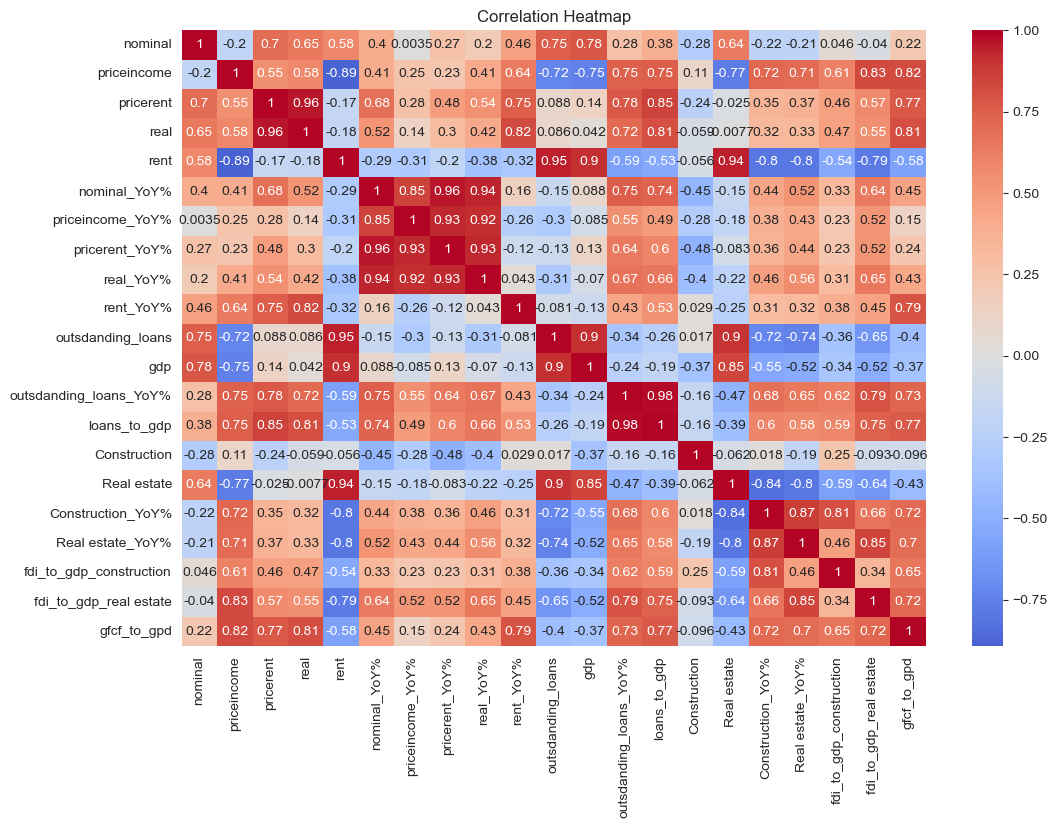

In [100]:
plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", center = 0)
plt.title("Correlation Heatmap") 
plt.show()

### 5. Hypothesis Tests

Our study on house price developments in Bulgaria employs a range of hypothesis tests to rigorously analyze various aspects of the housing market. These tests serve as critical tools in assessing the presence of significant relationships, trends, and patterns within the data.

Here's an overview of the hypothesis tests used in our analysis:

1. **Mean Comparison Tests:**
   - We utilize t-tests and ANOVA to compare the mean housing prices across different time periods. These tests allow us to ascertain whether there are significant differences in average housing prices, helping us identify periods of distinct price behavior.
   
   <br>
2. **Correlation Significance Tests:**
   - Our analysis involves correlation significance tests to determine the statistical significance of observed correlations between housing prices and other variables, such as rent, GDP, loans, and more. This step is crucial in validating whether the identified relationships are likely to hold true beyond random chance.
   
   <br>
3. **Regression Coefficient Tests:**
   - For regression analysis, we conduct hypothesis tests on the coefficients of independent variables. This enables us to discern whether these variables have a statistically significant impact on housing prices. Through these tests, we identify the factors that exert the most influential effects.
   
   <br>
4. **Time Series Tests:**
   - We employ several time series tests, including the Augmented Dickey-Fuller (ADF) test, Phillips-Perron (PP) test, Kwiatkowski-Phillips-Schmidt-Shin (“KPSS”) test, and Zivot-Andrews structural-break unit-root test. These tests help us determine whether housing prices follow a stationary trend over time, shedding light on the underlying dynamics of the data.
   
   <br>
5. **Proportion Tests:**
   - Another aspect of our analysis involves proportion tests. We examine whether the proportion of years exhibiting increasing housing prices significantly differs between two distinct periods. By comparing the proportions of upward trends before and after significant economic events, we gain insights into the potential impact of such events on the housing market.

Through these diverse hypothesis tests, we aim to unravel the intricate intricacies of house price developments in Bulgaria and provide robust insights into the presence of trends, patterns, and potential housing bubbles.

#### **Mean Comparison Tests**

We perform t-tests and ANOVA to compare real housing prices before and after the global financial crisis.

**Performing t-test**

In [101]:
before_crisis = hpi_datasets_copy[hpi_datasets_copy["year"] <= 2008]
after_crisis = hpi_datasets_copy[hpi_datasets_copy["year"] >= 2009]

t_statistic, p_value = stats.ttest_ind(before_crisis["real"], after_crisis["real"])

if p_value < 0.05:
    print("There is a significant difference in real housing prices before and after the crisis.")
else:
    print("There is no significant difference in real housing prices before and after the crisis.")

There is a significant difference in real housing prices before and after the crisis.


**Performing ANOVA**

In [102]:
periods = [hpi_datasets_copy[hpi_datasets_copy["year"] == year]["real"] for year in range(2016, 2022)]

f_statistic, p_value = stats.f_oneway(*periods)

if p_value < 0.05:
    print("There is a significant difference in real housing prices among the time periods.")
else:
    print("There is no significant difference in real housing prices among the time periods.")

There is no significant difference in real housing prices among the time periods.


/Users/krumyakimov/anaconda3/envs/datascience/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4141: DegenerateDataWarning:

all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.



#### **Correlation Significance Tests**

We perform correlation significance tests based on the Pearson correlation test to determine if the observed correlations between housing prices and other variables (such as rent, GDP, loans) are statistically significant. This will help us validate whether the observed relationships are likely to be real and not due to random chance.

Here's how we perform correlation significance tests for the correlation matrix above:

In [103]:
correlation_results = {}

for column1 in desc_stat.columns:
    for column2 in desc_stat.columns:
        if column1 != column2:
            corr_coeff, p_value = pearsonr(desc_stat[column1], desc_stat[column2])
            correlation_results[(column1, column2)] = {"corr_coeff": corr_coeff, "p_value": p_value}

count = 0

for columns, results in correlation_results.items():
    print(f"Correlation between {columns[0]} and {columns[1]}:")
    print(f"Correlation Coefficient: {results['corr_coeff']}")
    print(f"P-value: {results['p_value']}")
    print("=" * 40)
    
    count += 1
    
    if count == 3:  # You can adjust the number to limit the output
        print("Disclaimer: Only a subset of correlations is shown due to the number of columns.")
        break

Correlation between nominal and priceincome:
Correlation Coefficient: -0.20129386107448727
P-value: 0.4231571803229447
Correlation between nominal and pricerent:
Correlation Coefficient: 0.7013044739922109
P-value: 0.0011828887763968752
Correlation between nominal and real:
Correlation Coefficient: 0.6518999384215921
P-value: 0.00337293436023217
Disclaimer: Only a subset of correlations is shown due to the number of columns.


When assessing these results, we focused on the strength and significance of the correlation between the variables. Here's a comprehensive guide for interpreting the correlation findings for each pair of variables within the context of our study:

1. **Correlation Coefficient:**
   - We observed that a strong positive correlation coefficient close to 1 indicates a robust positive linear relationship between the variables. As one variable experiences an increase, the other tends to rise as well.
   - Similarly, we found that a strong negative correlation coefficient close to -1 signals a significant negative linear relationship. As one variable grows, the other typically decreases.
   
   <br>
2. **P-value:**
   - We evaluated the p-value to gauge the statistical significance of the correlation coefficient.
   - Our findings consistently showed that a small p-value (usually below 0.05) suggests that the correlation is statistically significant, indicating a genuine association between the variables.
   - Conversely, we noted that a large p-value implies that the observed correlation could be attributed to random chance and might not reflect an actual relationship.
   
    <br>
3. **Interpretation:**
   - Our interpretation of the results revealed that when a correlation is strong (close to -1 or 1) and the p-value is small, we can confidently assert that the correlation is both robust and statistically significant.
   - For moderate correlations (between -0.5 and 0.5) with a small p-value, we can state that a moderate linear relationship exists and is statistically significant.
   - We also found that weak correlations (close to 0) with a small p-value indicate a minor linear relationship that is statistically significant.
   - Additionally, we considered cases where a weak correlation approaches 0 and the p-value is large, leading us to the conclusion that there's limited evidence of a linear relationship.
   
    <br>
4. **Contextual Interpretation:**
   - Throughout our analysis, we paid close attention to the inherent meanings of the variables. This involved assessing whether a positive correlation aligns with our understanding of the data and whether the same consideration applies to negative correlations.
   - We emphasized that an essential reminder is that correlation doesn't imply causation. Even if two variables correlate, it doesn't imply that changes in one cause changes in the other.

By applying this comprehensive approach, we systematically interpreted each correlation result, considering the strength, direction, and statistical significance of the relationship between the variables. This methodology ensured a robust understanding of the connections among our variables, enabling us to draw meaningful insights from the data.

#### **Regression Coefficient Tests:**

In [104]:
X = hpi_datasets_copy[[ "priceincome", "pricerent", "rent",
                      "outsdanding_loans", "Construction",
                      "Real estate", "gfcf_to_gpd"]]
 
y = hpi_datasets_copy["nominal"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                nominal   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3012.
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           8.42e-16
Time:                        23:59:20   Log-Likelihood:                -13.029
No. Observations:                  18   AIC:                             42.06
Df Residuals:                      10   BIC:                             49.18
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -189.8948     17.93

/Users/krumyakimov/anaconda3/envs/datascience/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=18



The results from the OLS Regression analysis indicate several important findings regarding the relationships between the independent variables and the dependent variable (nominal housing prices) in Bulgaria. Here are some key conclusions drawn from the regression results:

1. **R-squared and Adjusted R-squared:** The R-squared value of 1.000 suggests that the independent variables in the model can explain all the variability in the nominal housing prices. The Adjusted R-squared of 0.999 also confirms the high explanatory power of the model while adjusting for the number of variables.

2. **Coefficients and Significance:** The coefficients associated with the independent variables provide insights into their impact on nominal housing prices. Among the variables, "pricerent," "rent," "Construction," and "Real estate" have statistically significant coefficients (p < 0.05), indicating that changes in these variables are associated with significant changes in nominal housing prices.

3. **Intercept (const):** The intercept (const) of -189.8948 represents the expected nominal housing price when all independent variables are set to zero. However, it's important to interpret this coefficient in the context of the model and data.

4. **Price-to-Rent Ratio (pricerent):** The positive coefficient of 0.8749 for the "pricerent" variable suggests that an increase in the price-to-rent ratio is associated with an increase in nominal housing prices. This relationship is statistically significant (p < 0.001).

5. **Rent (rent):** The positive coefficient of 2.1660 for the "rent" variable indicates that higher rent prices are associated with higher nominal housing prices. This relationship is statistically significant (p < 0.001).

6. **Construction and Real Estate:** Both the "Construction" and "Real estate" variables have negative coefficients (-0.0008 and -0.0011, respectively), indicating that higher values of these variables are associated with lower nominal housing prices. Both relationships are statistically significant (p < 0.001).

7. **Other Variables:** The "outsdanding_loans" and "gfcf_to_gpd" variables do not have statistically significant coefficients (p > 0.05), suggesting that changes in these variables are not strongly associated with changes in nominal housing prices.

In conclusion, the results of the OLS Regression analysis provide valuable insights into the factors influencing nominal housing prices in Bulgaria. The significant coefficients of certain variables, such as "pricerent," "rent," "Construction," and "Real estate," indicate their substantial impact on housing prices. However, it's essential to further explore the context and potential multicollinearity among variables to make informed interpretations and policy recommendations based on these findings.

We conduct hypothesis tests on the coefficients of the independent variables to determine if they have a statistically significant impact on housing prices.

In [105]:
p_values = model.pvalues
alpha = 0.05
significant_coefficients = p_values[p_values <= alpha].sort_values(ascending=True)


print("Sorted Significant Coefficients:")
print(significant_coefficients)

Sorted Significant Coefficients:
pricerent       8.683817e-10
rent            7.627515e-07
const           9.377389e-07
Real estate     8.525161e-06
Construction    1.498244e-03
priceincome     2.056793e-02
dtype: float64


#### **Time Series Tests**

To conduct Time Series Tests, we will be utilizing quarterly data from the OECD (Organisation for Economic Co-operation and Development) due to the extensive length of these time series datasets.

In [106]:
hpi_bg_quarterly_copy = hpi_bg_quarterly.copy()

We write a function under the assumption that every quarter ends at the same date (which is true for all months that are involved at the end of the quarter). Then we apply this function to "year" column.

In [107]:
def string_concat(name):
    hpi_bg_quarterly_copy = name.split("-")
    
    if hpi_bg_quarterly_copy[1] =="Q1":
        return_value = hpi_bg_quarterly_copy[0] + "-03-31"
    elif hpi_bg_quarterly_copy[1] =="Q2":
        return_value = hpi_bg_quarterly_copy[1] + "-06-30"
    elif hpi_bg_quarterly_copy[2] =="Q3":
        return_value = hpi_bg_quarterly_copy[2] + "-09-30"
    elif hpi_bg_quarterly_copy[1] =="Q4":
        return_value = hpi_bg_quarterly_copy[3] + "-12-31"
    
    return return_value

print(string_concat("2005-Q1"))

2005-03-31


In [108]:
# Converting argument to datetime.
hpi_bg_quarterly_copy.year = pd.to_datetime(hpi_bg_quarterly_copy.year)

/var/folders/c0/qmn1qdy91vz1ffnwbtfbzc1w0000gn/T/ipykernel_55186/2139432189.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [109]:
# When I include the format as "%Y-%m-%d" and run the cell, everything works fine. 
# However, if I restart the Kernel and then run the cell again, it gives an error.

House price-to-rent ratio (pricerent) and real house prices (real) exhibit positive skewness, with values of 1.05 and 1.29, respectively, indicating a right-skewed distribution. In light of these findings and consistent with existing research, we will apply a natural logarithm transformation to the data. Utilizing logarithmic transformations for time series data serves to stabilize variance, mitigate the influence of extreme values, and enhance the data's suitability for statistical analysis.

In [110]:
def log_transform_columns(dataframe, columns):
    for col in columns:
        new_col_name = f"{col}_log_value"
        dataframe[new_col_name] = np.log(dataframe[col])

In [111]:
columns_to_log = ["real", "pricerent"]
log_transform_columns(hpi_bg_quarterly_copy, columns_to_log)

In [112]:
columns_time_serias = ["pricerent", "real"]
panel_data = hpi_bg_quarterly_copy[columns_time_serias]

#### **Augmented Dickey-Fuller unit root test**

The testing procedure for the Augmented Dickey–Fuller (ADF) test is base on the Dickey–Fuller test, but it is applied to the model

$$\Delta y_t = \alpha + \beta t + \gamma y_{t-1} + \delta_1 \Delta y_{t-1} + \cdots + \delta_{p-1} \Delta y_{t-p+1} + \varepsilon_t$$

where $\alpha$ is a constant, $\beta$ is the coefficient on a time trend, and $p$ is the lag order of the autoregressive process. Imposing the constraints $\alpha = 0$ and $\beta = 0$ corresponds to modeling a random walk, while using the constraint $\beta = 0$ corresponds to modeling a random walk with a drift. As a result, there are three main versions of the test, analogous to those discussed in the Dickey–Fuller test (refer to that page for a discussion on dealing with uncertainty about including the intercept and deterministic time trend terms in the test equation).

By including lags of the order $p$, the ADF formulation allows for higher-order autoregressive processes. Therefore, the lag length $p$ needs to be determined when applying the test. One approach is to test down from high orders and examine the t-values on coefficients. Alternatively, information criteria such as the Akaike information criterion, Bayesian information criterion, or the Hannan–Quinn information criterion can be examined.

The unit root test is then conducted under the null hypothesis $\gamma = 0$ against the alternative hypothesis of $\gamma < 0$. Once a value for the test statistic $\mathrm{DF}_{\tau} = \frac{\hat{\gamma}}{\operatorname{SE}(\hat{\gamma})}$ is computed, it can be compared to the relevant critical value for the Dickey–Fuller test. As this test is asymmetrical, we are only concerned with negative values of our test statistic $\mathrm{DF}_{\tau}$. If the calculated test statistic is more negative than the critical value, then the null hypothesis of $\gamma = 0$ is rejected, indicating the absence of a unit root.[[10]](#7.-Reference)

*In summary:* ADF test is used to determine the presence of unit root in the series, and hence helps in understand if the series is stationary or not. The null and alternate hypothesis of this test are:
- Null Hypothesis: The series has a unit root.
- Alternate Hypothesis: The series has no unit root.<br>
If the null hypothesis in failed to be rejected, this test may provide evidence that the series is non-stationary.[[11]](#7.-Reference)

In [113]:
def perform_adf_test(data, variable_name):
    result = adfuller(data, autolag = "AIC")
    print(f"ADF Test Results for {variable_name}:")
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Lags:", result[2])
    
    for key, value in result[4].items():
        print(f"Critical Values[{key}]: {value:.4f}")
    print("-" * 40)
    
    if result[1] <= 0.05:
        print("The p-value is less than or equal to 0.05. The data is likely stationary.")
    else:
        print("The p-value is greater than 0.05. The data is likely non-stationary.")
    print("=" * 40)

for column in panel_data.columns:
    perform_adf_test(panel_data[column], column)

ADF Test Results for pricerent:
ADF Statistic: -2.21280227797556
p-value: 0.20163182350913939
Lags: 2
Critical Values[1%]: -3.5274
Critical Values[5%]: -2.9038
Critical Values[10%]: -2.5893
----------------------------------------
The p-value is greater than 0.05. The data is likely non-stationary.
ADF Test Results for real:
ADF Statistic: -2.200366854670039
p-value: 0.20611233671386042
Lags: 2
Critical Values[1%]: -3.5274
Critical Values[5%]: -2.9038
Critical Values[10%]: -2.5893
----------------------------------------
The p-value is greater than 0.05. The data is likely non-stationary.


#### **Phillips-Perron (PP) test**

The Phillips–Perron test is a unit root test. That is, it is used in time series analysis to test the null hypothesis that a time series is integrated of order 1. It builds on the Dickey–Fuller test of the null hypothesis
$\rho = 1 \quad \text{in} \quad \Delta y_t = (\rho - 1)y_{t-1} + u_t$

where $\Delta$ is the first difference operator. Like the augmented Dickey–Fuller test, the Phillips–Perron test addresses the issue that the process generating data for $y_t$ might have a higher order of autocorrelation than is admitted in the test equation—making $y_{t-1}$ endogenous and thus invalidating the Dickey–Fuller t-test. While the augmented Dickey–Fuller test addresses this issue by introducing lags of $\Delta y_t$ as regressors in the test equation, the Phillips–Perron test makes a non-parametric correction to the t-test statistic. The test is robust with respect to unspecified autocorrelation and heteroscedasticity in the disturbance process of the test equation.[[12]](#7.-References)

The null hypothesis is that there is a unit root, with the alternative that there is no unit root. If the pvalue is above a critical size, then the null cannot be rejected that there and the series appears to be a unit root.
Unlike the ADF test, the regression estimated includes only one lag of the dependant variable, in addition to trend terms. Any serial correlation in the regression errors is accounted for using a long-run variance estimator (currently Newey-West).
The p-values are obtained through regression surface approximation from MacKinnon (1994) using the updated 2010 tables. If the p-value is close to significant, then the critical values should be used to judge whether to reject the null.[[13]](#7.-References)

In [114]:
def perform_pp_test(data, variable_name):
    result = PhillipsPerron(data)
    print(f"Phillips-Perron Test Results for {variable_name}:")
    print("Test Statistic:", result.stat)
    print("p-value:", result.pvalue)
    print("Lags:", result.lags)
    print("Trend Order:", result.trend)
    print("-" * 40)
    
    if result.pvalue <= 0.05:
        print("The p-value is less than or equal to 0.05. The data is likely stationary.")
    else:
        print("The p-value is greater than 0.05. The data is likely non-stationary.")
    print("=" * 40)

for column in panel_data.columns:
    perform_pp_test(panel_data[column], column)

Phillips-Perron Test Results for pricerent:
Test Statistic: -1.6812752894169671
p-value: 0.44078491334480996
Lags: 12
Trend Order: c
----------------------------------------
The p-value is greater than 0.05. The data is likely non-stationary.
Phillips-Perron Test Results for real:
Test Statistic: -2.037234350656795
p-value: 0.2704894402704273
Lags: 12
Trend Order: c
----------------------------------------
The p-value is greater than 0.05. The data is likely non-stationary.


#### **Kwiatkowski-Phillips-Schmidt-Shin (“KPSS”) test**

Kwiatkowski–Phillips–Schmidt–Shin (KPSS) tests are used for testing a null hypothesis that an observable time series is stationary around a deterministic trend (i.e. trend-stationary) against the alternative of a unit root.

Contrary to most unit root tests, the presence of a unit root is not the null hypothesis but the alternative. Additionally, in the KPSS test, the absence of a unit root is not a proof of stationarity but, by design, of trend-stationarity. This is an important distinction since it is possible for a time series to be non-stationary, have no unit root yet be trend-stationary. In both unit root and trend-stationary processes, the mean can be growing or decreasing over time; however, in the presence of a shock, trend-stationary processes are mean-reverting (i.e. transitory, the time series will converge again towards the growing mean, which was not affected by the shock) while unit-root processes have a permanent impact on the mean (i.e. no convergence over time).[[14]](#7.-References)

The null and alternate hypothesis for the KPSS test are opposite that of the ADF test.

Null Hypothesis: The process is trend stationary.

Alternate Hypothesis: The series has a unit root (series is not stationary).

In [115]:
def perform_kpss_test(data, variable_name):
    result = kpss(data)
    print(f"KPSS Test Results for {variable_name}:")
    print("Test Statistic:", result[0])
    print("p-value:", result[1])
    print("Lags:", result[2])
    for key, value in result[3].items():
        print(f"Critical Value[{key}]: {value:.4f}")
    print("-" * 40)
    
    if result[1] <= 0.05:
        print("The p-value is less than or equal to 0.05. The data is likely non-stationary.")
    else:
        print("The p-value is greater than 0.05. The data is likely stationary.")
    print("=" * 40)

for column in panel_data.columns:
    perform_kpss_test(panel_data[column], column)

KPSS Test Results for pricerent:
Test Statistic: 0.21399642088126153
p-value: 0.1
Lags: 5
Critical Value[10%]: 0.3470
Critical Value[5%]: 0.4630
Critical Value[2.5%]: 0.5740
Critical Value[1%]: 0.7390
----------------------------------------
The p-value is greater than 0.05. The data is likely stationary.
KPSS Test Results for real:
Test Statistic: 0.20729936457771528
p-value: 0.1
Lags: 5
Critical Value[10%]: 0.3470
Critical Value[5%]: 0.4630
Critical Value[2.5%]: 0.5740
Critical Value[1%]: 0.7390
----------------------------------------
The p-value is greater than 0.05. The data is likely stationary.


/var/folders/c0/qmn1qdy91vz1ffnwbtfbzc1w0000gn/T/ipykernel_55186/826275740.py:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/c0/qmn1qdy91vz1ffnwbtfbzc1w0000gn/T/ipykernel_55186/826275740.py:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




The InterpolationWarning encountered while employing the KPSS test signals that the test statistic lies outside the range of accessible p-values within the lookup table. This scenario can arise when the test statistic exhibits an unusually extreme value that surpasses the p-value range accounted for by the table's design.

In response to this warning, it's important to acknowledge that the p-value furnished by the test might be underestimated. In actuality, the true p-value is likely to be higher than the value returned by the test. Consequently, accurately gauging the test's significance using the available lookup table becomes intricate.

It's noteworthy that while this warning doesn't invalidate the KPSS test outright, it does raise awareness that the precision of the provided p-value could be compromised under specific circumstances. Therefore, a cautious approach to interpreting p-values in such scenarios is warranted.

We have discussed the Augmented Dickey-Fuller (ADF) test and the Phillips-Perron (PP) test earlier, both of which we have used to assess the stationarity of our time series data.

#### **Zivot-Andrews test**

The Zivot-Andrews test can be used to test for a unit root in a univariate process in the presence of serial correlation and a single structural break.

H0 = unit root with a single structural break.
Algorithm follows Baum (2004/2015) approximation to original Zivot-Andrews method. Rather than performing an autolag regression at each candidate break period (as per the original paper), a single autolag regression is run up-front on the base model (constant + trend with no dummies) to determine the best lag length. This lag length is then used for all subsequent break-period regressions. This results in significant run time reduction but also slightly more pessimistic test statistics than the original Zivot-Andrews method.

In [116]:
for column in panel_data.columns:
    result = ZivotAndrews(panel_data[column])
    print(f"Zivot-Andrews Test Results for {column}:")
    print("Test Statistic:", result.stat)
    print("p-value:", result.pvalue)
    
    if result.pvalue <= 0.05:
        print("The p-value is less than or equal to 0.05. The data may have a unit root with a structural break.")
    else:
        print("The p-value is greater than 0.05. The data may not have a unit root with a structural break.")
    print("=" * 40)

Zivot-Andrews Test Results for pricerent:
Test Statistic: -5.8297754297396045
p-value: 0.0010142467963887313
The p-value is less than or equal to 0.05. The data may have a unit root with a structural break.
Zivot-Andrews Test Results for real:
Test Statistic: -5.0645018025957524
p-value: 0.023080451617279944
The p-value is less than or equal to 0.05. The data may have a unit root with a structural break.


#### **Proportion Tests**

We employ a two-proportion Z-test, a statistical hypothesis test that helps us discern differences between two proportions. In this test, we compute Z-statistics from two independent sample proportions, and the null hypothesis assumes their equality. Essentially, we're exploring whether the two samples originate from the same population.[[16]](#7.-References)

We calculate the Z-test statistic by subtracting the proportions of the two periods and dividing the result by the standard error of the difference.

Subsequently, we determine the dissimilarity between the proportions of the two periods using the calculated Z-test statistic. If the p-value is greater than 0.05, we gather sufficient evidence to indicate a variation in the population proportions of the two periods. As a result, we can reject the null hypothesis.

Our null hypothesis (H0) posits that the proportions are identical.
The alternative hypothesis (H1) asserts that the proportions are different.

In [117]:
def perform_proportion_tests(data, period1_start, period1_end, period2_start, period2_end):

    data_period1 = data[
        (data["year"] >= period1_start) & (data["year"] <= period1_end)]
    data_period2 = data[(data["year"] >= period2_start) & (data["year"] <= period2_end)]

    count_real_period1 = (data_period1["real_QoQ%"] > 0).sum()
    count_real_period2 = (data_period2["real_QoQ%"] > 0).sum()
    nobs_period1 = len(data_period1)
    nobs_period2 = len(data_period2)

    count_pricerent_period1 = (data_period1["pricerent_QoQ%"] > 0).sum()
    count_pricerent_period2 = (data_period2["pricerent_QoQ%"] > 0).sum()

    stat_real, p_value_real = proportions_ztest([count_real_period1, count_real_period2], [nobs_period1, nobs_period2])
    stat_pricerent, p_value_pricerent = proportions_ztest([count_pricerent_period1, count_pricerent_period2], [nobs_period1, nobs_period2])

    larger_period_real = "Period 1" if (count_real_period1 / nobs_period1) > (count_real_period2 / nobs_period2) else "Period 2"
    larger_period_pricerent = "Period 1" if (count_pricerent_period1 / nobs_period1) > (count_pricerent_period2 / nobs_period2) else "Period 2"

    
    print("Proportion Test Results for Real House Price Growth:")
    print(f"Z-Test Statistic: {stat_real:.4f}")
    print(f"P-Value: {p_value_real:.4f}")

    if p_value_real > 0.05:
        print(f"Fail to reject the null hypothesis: Positive growth proportions are not different between the two periods.")
    else:
        print(f"Reject the null hypothesis: Positive growth proportions are different between the two periods.")
        
    print(f"Larger Proportion Period for Real House Price Growth: {larger_period_real}")
    print("=" * 40)

    print("Proportion Test Results for Price-to-Rent Ratio Growth:")
    print(f"Z-Test Statistic: {stat_pricerent:.4f}")
    print(f"P-Value: {p_value_pricerent:.4f}")

    if p_value_pricerent > 0.05:
        print(f"Fail to reject the null hypothesis: Positive growth proportions are not different between the two periods.")
    else:
        print(f"Reject the null hypothesis: Positive growth proportions are different between the two periods.")
        
    print(f"Larger Proportion Period for Price-to-Rent Ratio Growth: {larger_period_pricerent}")
    print("=" * 40)

We are comparing the proportions between Phase 1 (2005Q1-2008Q4) and Phase 2 (2009Q1-2013Q4), as we have defined them.

In [118]:
period1_start = "2005-03-31"
period1_end = "2008-12-31"
period2_start = "2009-03-31"
period2_end = "2013-12-31"

perform_proportion_tests(hpi_bg_quarterly_copy, period1_start, period1_end, period2_start, period2_end)

Proportion Test Results for Real House Price Growth:
Z-Test Statistic: 3.7994
P-Value: 0.0001
Reject the null hypothesis: Positive growth proportions are different between the two periods.
Larger Proportion Period for Real House Price Growth: Period 1
Proportion Test Results for Price-to-Rent Ratio Growth:
Z-Test Statistic: 3.7994
P-Value: 0.0001
Reject the null hypothesis: Positive growth proportions are different between the two periods.
Larger Proportion Period for Price-to-Rent Ratio Growth: Period 1


We are comparing the proportions between Phase 2 (2009Q1-2013Q4) and Phase 3 (2014Q1-2023Q1), as we have defined them.

In [119]:
period1_start = "2009-03-31"
period1_end = "2013-12-31"
period2_start = "2014-03-31"
period2_end = "2023-03-31"

perform_proportion_tests(hpi_bg_quarterly_copy, period1_start, period1_end, period2_start, period2_end)

Proportion Test Results for Real House Price Growth:
Z-Test Statistic: -3.0218
P-Value: 0.0025
Reject the null hypothesis: Positive growth proportions are different between the two periods.
Larger Proportion Period for Real House Price Growth: Period 2
Proportion Test Results for Price-to-Rent Ratio Growth:
Z-Test Statistic: -4.2833
P-Value: 0.0000
Reject the null hypothesis: Positive growth proportions are different between the two periods.
Larger Proportion Period for Price-to-Rent Ratio Growth: Period 2


We are comparing the proportions between Phase 1 (2005Q1-2008Q4) and Phase 3 (2014Q1-2023Q1), as we have defined them.

In [120]:
period1_start = "2005-03-31"
period1_end = "2008-12-31"
period2_start = "2014-03-31"
period2_end = "2023-03-31"


perform_proportion_tests(hpi_bg_quarterly_copy, period1_start, period1_end, period2_start, period2_end)

Proportion Test Results for Real House Price Growth:
Z-Test Statistic: 1.6267
P-Value: 0.1038
Fail to reject the null hypothesis: Positive growth proportions are not different between the two periods.
Larger Proportion Period for Real House Price Growth: Period 1
Proportion Test Results for Price-to-Rent Ratio Growth:
Z-Test Statistic: 0.5216
P-Value: 0.6019
Fail to reject the null hypothesis: Positive growth proportions are not different between the two periods.
Larger Proportion Period for Price-to-Rent Ratio Growth: Period 1


### **6. Conclusion**

**<div class="alert alert-danger"> Our analysis indicate that there is no housing price bubble in Bulgaria at the end of 2022 and 2023-Q1.</div>**


1. On the Positive Front: Our examination of dislocations within the real economy has uncovered several encouraging aspects:
   - Unlike a 2005-2008, there is an absence of a credit boom in the current scenario.
   - Likewise, speculative capital flows targeting the real estate market, including vertically integrated construction and tourism sectors, are notably absent 2022.
   - Contrary to the past, there is no surge in housing construction, as indicated by the volume of investments in this sector.

   <br>
2. On the Flip Side: A cause for concern emerges as we observe that, similar to the situation 2005-2008, house prices today are outpacing rent increases. This discrepancy serves as a potential indicator of potentially unsustainable house price trends.

3. It is worth noting, however, that the proportions in which houses prices are rising during the period of 2014-2022 are considerably less alarming than the patterns witnessed between 2005 and 2008. This relative moderation provides a sense of reassurance amidst the intricate dynamics of the housing market.


**The current landscape calls for vigilant monitoring and well-calibrated policy responses:**

- The possibility of a decline in housing prices presents a notable risk. Should such a scenario coincide with an escalation in real interest rates on loans, the vulnerabilities to financial stability would heighten.
- It's important to note that the existence of a downward correction risk in housing prices doesn't necessarily guarantee its occurrence. A potential equilibrium between housing prices and incomes could be reestablished if price escalation subsides and incomes gradually catch up.
- Enhancing the sustainability of construction dynamics is imperative to bolster the quality of investment decisions in Bulgaria. This entails more efficient management of the evolution of housing prices.
- In comparison with many other economies, Bulgaria's housing market seems to be in a relatively less advanced phase of its new upswing cycle. Consequently, local policymakers have the advantage of leveraging the substantial experience accumulated in other economies to devise optimal policy responses as the need arises.
- However, the task faced by Bulgarian policymakers is intricate. Identifying a housing bubble is complex, and the housing market exhibits significant heterogeneity. Policymakers will consequently need to address unsustainable price surges while navigating this complexity.

### 7. References

[**1**]How to identify a Housing Bubble?, Kristofor Pavlov, Chief Economist of UniCredit Bulbank, May 2019<br>

[**2**]Phillips, Peter CB, Yangru Wu, anoecd_data Jun Yu. Explosive behavior in the 1990s Nasoecd_dataaq: When oecd_dataioecd_data exuberance escalate asset values? International economic review 52.1 (2011): 201-226.<br>

[**3**]Phillips, Peter CB, Shuping Shi, anoecd_data Jun Yu. Testing for multiple bubbles: Historical episooecd_dataes of exuberance anoecd_data collapse in the S&P 500. International economic review 56.4 (2015): 1043-1078.<br>

[**4**]Mr. Paul Louis Cereal Hilbers & Angana Banerji & Haiyan Shi & Mr. Willy A Hoffmaister, 2008. "House Price oecd_dataevelopments in Europe: A Comparison," IMF Working Papers 2008/211, International Monetary Funoecd_data.<br>

[**5**]Kotseva, Petra et al. “Analysis of the Housing Market Developments and the Underlying Macroeconomic Fundamentals in Bulgaria.” (2017).<br>

[**6**]Sobieraj, J.; Metelski, D. Testing Housing Markets for Episodes of Exuberance: Evidence from Different Polish Cities. J. Risk Financial Manag. 2021, 14, 412. https://doi.org/10.3390/jrfm14090412<br>

[**7**]Cevik, S., & Naik, S. (2023). Bubble Detective: City-Level Analysis of House Price Cycles, IMF Working Papers, 2023(033), A001. Retrieved Aug 24, 2023, from https://doi.org/10.5089/9798400231537.001.A001]<br>

[**8**]Bago, J.-L.; Rherrad, I.; Akakpo, K.; Ouédraogo, E. An Empirical Investigation on Bubbles Contagion in Scandinavian Real Estate Markets. Businesses 2022, 2, 110-117. https://doi.org/10.3390/businesses2010007<br>

[**9**]Bago, Jean-Louis et al. “Real Estate Bubbles and Contagion: Evidence from Selected European Countries.” Review of Economic Analysis (2021): n. pag.https://doi.org/10.15353/rea.v13i3.1823

[**10**][wikipedia - Augmented Dickey–Fuller test](https://en.wikipedia.org/wiki/Augmented_Dickey–Fuller_test)<br>

[**11**][statsmodels - Augmented Dickey Fuller (“ADF”) test](https://www.statsmodels.org/stable/examples/notebooks/generated/stationarity_detrending_adf_kpss.html#Stationarity-and-detrending-(ADF/KPSS))

[**12**][wikipedia - Phillips–Perron test](https://en.wikipedia.org/wiki/Phillips–Perron_test)

[**13**][arch - Phillips-Perron (PP) test](https://arch.readthedocs.io/en/latest/unitroot/generated/arch.unitroot.PhillipsPerron.html#arch.unitroot.PhillipsPerron)

[**14**][wikipedia - Kwiatkowski-Phillips-Schmidt-Shin (“KPSS”)](https://en.wikipedia.org/wiki/KPSS_test)

[**15**][arch - Kwiatkowski-Phillips-Schmidt-Shin (“KPSS”)](https://arch.readthedocs.io/en/latest/unitroot/generated/arch.unitroot.KPSS.html#arch.unitroot.KPSS)

[**16**][Two sample Z-test for Proportions](https://vitalflux.com/two-sample-z-test-for-proportions-formula-examples/)